# Business Understanding
## Introduction:

* Company valuation: $31 Billion
* Present in 34,000+ cities across 190+ countries.
* Having 1.2 Million listings, the company has served over 35 Million guests.
* 140,000+ people stay at an Airbnb listed place every day.

## Business understanding of Airbnb:

The 3 customer segments defining Airbnb’s Business Model:

1. **Hosts** list out their property details on Airbnb along with other factors like pricing, amenities provided etc.
2. Airbnb sends a **professional photographer** to the property location in order to take high quality photographs.
3. **Travelers** search for a property in the city where they wish to stay and browse available options according to price, amenities etc.
4.	Booking is made through Airbnb where traveler pays the amount mentioned by host and some additional money as transaction charges.
5.	Host approves the booking. Traveler stays there and finally Airbnb pays the amount to the host after deducting their commission.

## How Airbnb makes money?

* Commission from Property Owners (Hosts): Airbnb charges flat 10% commission from hosts upon every booking done through the platform.

* Transaction fee from Travellers (Guests): Airbnb charges 3% of the booking amount as transaction charges from travellers upon every confirmed booking.

## Future:

Having a presence in 190+ countries across the world, it is now concentrating to further increase the daily transactions on its platform. 


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import qgrid
import mpld3

## Reading the csv file

In [2]:
#loading the csv file
df = pd.read_csv('listings.csv')

In [3]:
dtypes_update = pd.DataFrame({'datatypes':df.dtypes, 'null_values':df.isna().sum()/len(df)*100, 'levels':df.nunique()})

In [4]:
dtypes_update.reset_index(inplace = True)
dtypes_update

,index,datatypes,null_values,levels
0,id,int64,0.000000,7675
1,listing_url,object,0.000000,7675
2,scrape_id,float64,0.000000,1
3,last_scraped,int64,0.000000,1
4,name,object,0.026059,7245
...,...,...,...,...
62,cancellation_policy,object,0.000000,6
63,require_guest_profile_picture,object,0.000000,2
64,require_guest_phone_verification,object,0.000000,2
65,calculated_host_listings_count,int64,0.000000,53


In [5]:
#checking shape of the dataframe
df.shape

(7675, 67)

In [6]:
#Checking for any duplicate values
df.drop_duplicates(inplace = True)
df.shape

(7675, 67)

In [7]:
#checking first 5 rows of the data set
df.head()

,id,listing_url,scrape_id,last_scraped,name,experiences_offered,thumbnail_url,medium_url,picture_url,xl_picture_url,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,2.020000e+13,43733,COZICOMFORT LONG TERM STAY ROOM 2,none,NaN,NaN,https://a0.muscache.com/im/pictures/24485541/6...,NaN,...,f,NaN,NaN,f,f,flexible,t,t,2,0.01
1,50646,https://www.airbnb.com/rooms/50646,2.020000e+13,43733,Pleasant Room along Bukit Timah,none,NaN,NaN,https://a0.muscache.com/im/pictures/36342984/6...,NaN,...,f,NaN,NaN,f,f,moderate,f,t,1,0.27
2,56334,https://www.airbnb.com/rooms/56334,2.020000e+13,43733,COZICOMFORT,none,NaN,NaN,https://a0.muscache.com/im/pictures/20783922/1...,NaN,...,f,NaN,NaN,f,f,flexible,t,t,2,0.20
3,71609,https://www.airbnb.com/rooms/71609,2.020000e+13,43733,Ensuite Room (Room 1 & 2) near EXPO,none,NaN,NaN,https://a0.muscache.com/im/pictures/24453191/3...,NaN,...,f,NaN,NaN,t,f,moderate,f,t,9,0.16
4,71896,https://www.airbnb.com/rooms/71896,2.020000e+13,43733,B&B Room 1 near Airport & EXPO,none,NaN,NaN,https://a0.muscache.com/im/pictures/2440674/ac...,NaN,...,f,NaN,NaN,t,f,moderate,f,t,9,0.22


In [8]:
#summary of the dataset
df.describe()

,id,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,latitude,...,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,7.675000e+03,7.675000e+03,7675.0,0.0,0.0,0.0,7.675000e+03,6272.000000,0.0,7675.000000,...,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,4903.000000,0.0,7675.000000,5040.000000
mean,2.356802e+07,2.020000e+13,43733.0,NaN,NaN,NaN,9.097458e+07,0.918013,NaN,1.314365,...,1.989055,15.292378,18.508534,938.243909,13.301759,5.529772,90.519274,NaN,38.967166,1.043764
std,1.035698e+07,0.000000e+00,0.0,NaN,NaN,NaN,8.220298e+07,0.185214,NaN,0.030191,...,1.615144,20.964532,42.791444,1662.536873,30.540358,11.649192,12.117606,NaN,65.100177,1.311470
min,4.909100e+04,2.020000e+13,43733.0,NaN,NaN,NaN,2.366600e+04,0.000000,NaN,1.242790,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000,NaN,1.000000,0.010000
25%,1.583604e+07,2.020000e+13,43733.0,NaN,NaN,NaN,2.313970e+07,0.940000,NaN,1.296625,...,1.000000,0.000000,1.000000,1124.000000,0.000000,0.000000,87.000000,NaN,2.000000,0.180000
50%,2.468917e+07,2.020000e+13,43733.0,NaN,NaN,NaN,6.336056e+07,1.000000,NaN,1.311180,...,1.000000,10.000000,3.000000,1125.000000,2.000000,1.000000,94.000000,NaN,9.000000,0.540000
75%,3.267123e+07,2.020000e+13,43733.0,NaN,NaN,NaN,1.513169e+08,1.000000,NaN,1.322180,...,2.000000,25.000000,14.000000,1125.000000,11.000000,5.000000,100.000000,NaN,45.000000,1.360000
max,3.889002e+07,2.020000e+13,43733.0,NaN,NaN,NaN,2.975498e+08,1.000000,NaN,1.454590,...,16.000000,404.000000,1000.000000,100000.000000,331.000000,164.000000,100.000000,NaN,285.000000,16.110000


In [9]:
#Checking the format of date time
df.host_since

0       20-10-2010
1       08-09-2010
2       20-10-2010
3       29-01-2011
4       29-01-2011
           ...    
7670    29-04-2015
7671    27-08-2016
7672    08-08-2017
7673    22-02-2012
7674    27-01-2019
Name: host_since, Length: 7675, dtype: object

In [10]:
#Checking columns of the dataset
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'experiences_offered', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_group', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'review

In [11]:
#checking null values
df.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   2
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   2635
Length: 67, dtype: int64

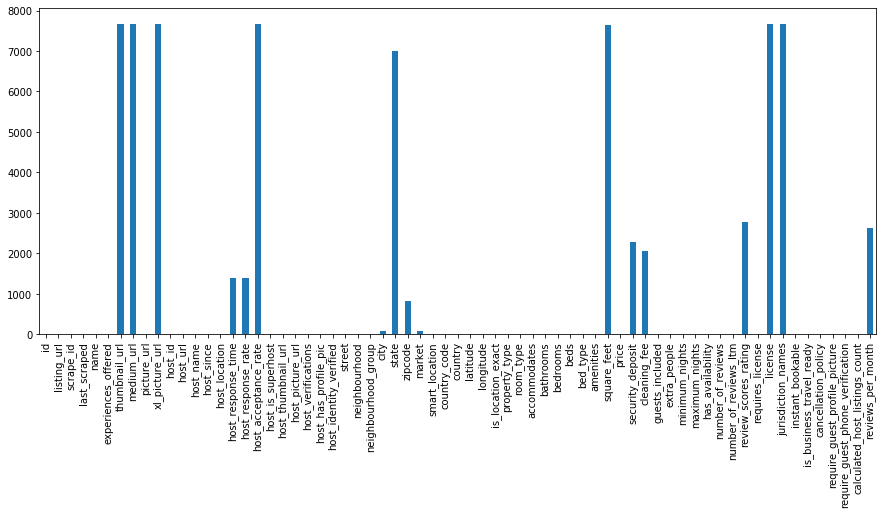

In [12]:
plt.figure(figsize = (15,6))
df.isna().sum().plot(kind = 'bar')
plt.show()

In [13]:
#Checking number of levels in the columns with data type category or obejct 
def levels(df):
    cols = df.select_dtypes(['object', 'category']).columns
    a = pd.DataFrame({'col':cols, 'number':[x for x in df[cols].nunique()]})
    return a
result = levels(df)
result

,col,number
0,listing_url,7675
1,name,7245
2,experiences_offered,1
3,picture_url,7114
4,host_url,2640
5,host_name,1805
6,host_since,1626
7,host_location,226
8,host_response_time,4
9,host_is_superhost,2


In [14]:
# Checking value counts
df.require_guest_phone_verification.value_counts(normalize = True)

f    0.989316
t    0.010684
Name: require_guest_phone_verification, dtype: float64

Since majority of the dataset has f this column might not add a lot of value for prediction

In [15]:
df.require_guest_profile_picture.value_counts(normalize=True)

f    0.99114
t    0.00886
Name: require_guest_profile_picture, dtype: float64

In [16]:
df.market.value_counts(dropna = False, normalize = True)

Singapore      0.985798
NaN            0.011857
Johor Bahru    0.002215
Bangkok        0.000130
Name: market, dtype: float64

Since majority of the dataset has f this column might not add a lot of value for prediction

In [17]:
drop_cols = ['city', 'experiences_offered', 'host_acceptance_rate', 'host_id',
       'host_location', 'host_name', 'host_picture_url', 'host_thumbnail_url',
       'host_url', 'id', 'jurisdiction_names', 'last_scraped', 'license',
       'listing_url', 'medium_url', 'name', 'neighbourhood', 'picture_url',
       'requires_license', 'scrape_id', 'smart_location', 'state', 'street',
       'thumbnail_url', 'xl_picture_url', 'zipcode','country_code','is_business_travel_ready',
       'has_availability','country', 'host_verifications', 'host_has_profile_pic', 'square_feet', 'reviews_per_month',
       'market', 'calculated_host_listings_count', 'number_of_reviews_ltm','require_guest_profile_picture',
        'require_guest_phone_verification']

The columns metioned above are being dropped for the following reasons:
1. The values are unique
2. A lot of null values
3. One class very high in number almost

In [18]:
df.drop(drop_cols, axis = 1, inplace=True)

In [19]:
df.isna().sum()

host_since                   4
host_response_time        1403
host_response_rate        1403
host_is_superhost            1
host_identity_verified       1
neighbourhood_group          0
latitude                     0
longitude                    0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    5
bedrooms                     2
beds                        14
bed_type                     0
amenities                    0
price                        0
security_deposit          2292
cleaning_fee              2055
guests_included              0
extra_people                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating      2772
instant_bookable             0
cancellation_policy          0
dtype: int64

In [20]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_group,latitude,longitude,is_location_exact,property_type,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,20-10-2010,within a few hours,1.0,f,f,North Region,1.44255,103.79580,t,Apartment,...,NaN,NaN,1,14,180,360,1,94.0,f,flexible
1,08-09-2010,NaN,NaN,f,f,Central Region,1.33235,103.78521,t,Apartment,...,NaN,NaN,2,20,90,730,18,91.0,f,moderate
2,20-10-2010,within a few hours,1.0,f,f,North Region,1.44246,103.79667,t,Apartment,...,NaN,NaN,1,14,6,14,20,98.0,f,flexible
3,29-01-2011,within a few hours,1.0,f,t,East Region,1.34541,103.95712,t,Villa,...,275.0,55.0,4,28,1,1125,15,84.0,t,moderate
4,29-01-2011,within a few hours,1.0,f,t,East Region,1.34567,103.95963,t,House,...,138.0,28.0,1,21,1,1125,22,81.0,t,moderate


In [21]:
#columns remaining after dropping columns
pd.Series(df.columns)

0                 host_since
1         host_response_time
2         host_response_rate
3          host_is_superhost
4     host_identity_verified
5        neighbourhood_group
6                   latitude
7                  longitude
8          is_location_exact
9              property_type
10                 room_type
11              accommodates
12                 bathrooms
13                  bedrooms
14                      beds
15                  bed_type
16                 amenities
17                     price
18          security_deposit
19              cleaning_fee
20           guests_included
21              extra_people
22            minimum_nights
23            maximum_nights
24         number_of_reviews
25      review_scores_rating
26          instant_bookable
27       cancellation_policy
dtype: object

In [22]:
#checking null values
df.isna().sum()

host_since                   4
host_response_time        1403
host_response_rate        1403
host_is_superhost            1
host_identity_verified       1
neighbourhood_group          0
latitude                     0
longitude                    0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    5
bedrooms                     2
beds                        14
bed_type                     0
amenities                    0
price                        0
security_deposit          2292
cleaning_fee              2055
guests_included              0
extra_people                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating      2772
instant_bookable             0
cancellation_policy          0
dtype: int64

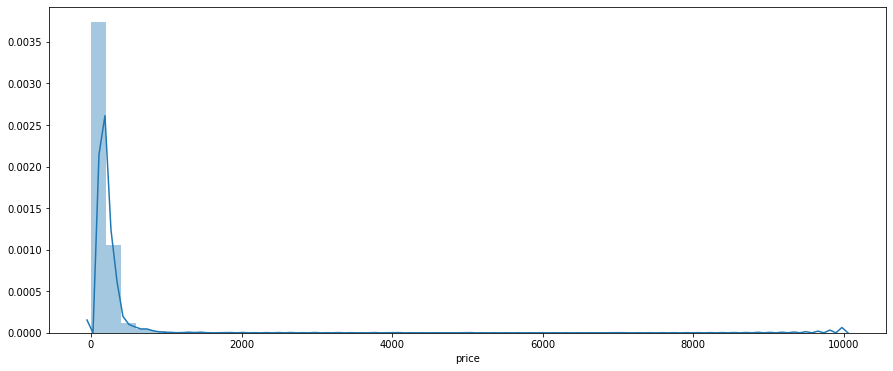

In [23]:
#original price distribution
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
sns.distplot(df.price, hist= True)
plt.show()

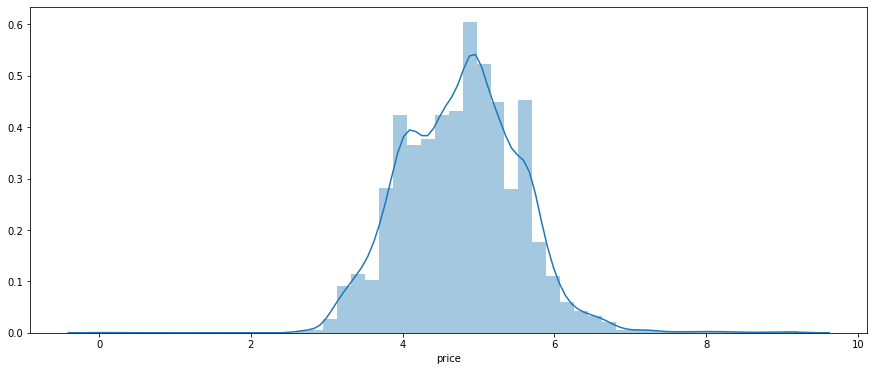

In [24]:
plt.figure(figsize = (15,6))
sns.distplot(np.log1p(df.price), hist= True)
plt.show()

The threshold has been selected as 500 because the data above 500 is sparse and doesnt have enough data points for model building  

In [22]:
#taking the dataframe where price is less than 500
df = df[df.price<500]

In [23]:
#checking index where price is 0
df[df.price == 0 ].index

Int64Index([3078], dtype='int64')

In [24]:
#dropping index where prince  = 0
df.drop(df[df.price ==0 ].index, axis = 0, inplace = True)

In [25]:
#resetting the index for order in the dataframe
df = df.reset_index(drop=True)

In [26]:
#checking the shape of the dataframe
df.shape

(7468, 28)

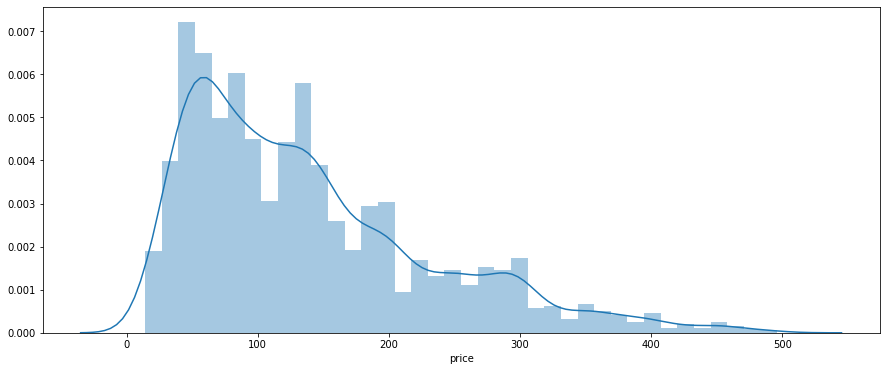

In [27]:
#price distribution after removing outliers
plt.figure(figsize = (15,6))
sns.distplot(df.price)
plt.show()

## Preprocessing data which does not have dependencies

In [28]:
#Converting intp category
df.instant_bookable = df.instant_bookable.astype('category')

In [29]:
#Checking unique values in the column cancellation policy
df.cancellation_policy.unique()

array(['flexible', 'moderate', 'strict_14_with_grace_period',
       'super_strict_30', 'strict', 'super_strict_60'], dtype=object)

The following replacements can be done in cancellation policy for uniformity of data:
1. 'strict_14_with_grace_period':'strict'
2. 'super_strict_30':'strict',
3. 'super_strict_60':'strict'

In [30]:
#reducing the number of categories
df.cancellation_policy.replace({'strict_14_with_grace_period':'strict',
                                'super_strict_30':'strict',
                                'super_strict_60':'strict',
                               }, inplace = True)
df.cancellation_policy = df.cancellation_policy.astype('category')

In [31]:
#Checking for null values
df.host_since.isna().sum()

4

host_since column has a few more rows in which the data is not of the form datetime.

The data entry done is that off an url

Identifying the rows where the data is not of the type datetime

In [32]:
#checking the format of date time
from datetime import datetime
index = []
for i in range(len(df)):
    try:
        df.loc[i,'host_since'] = datetime.strptime(df.loc[i,'host_since'], '%d-%m-%Y')
    except:
        index.append(i)
index

[2887, 2890, 3349, 5292, 5818, 6385, 7222, 7355, 7356, 7357]

Dropping the above mentioned indices. 

A new column by the name 'time' is feature engineered which tells us the number of months the property is listed on Airbnb. The reference date to calculate time is taken as 24-10-2019

In [33]:
#feature engineering time column
today = datetime(2019, 10, 24)
df.drop(index, axis = 0, inplace = True)
df.host_since = df.host_since.astype('datetime64')
df['time'] = df['host_since'].apply(lambda x: (today.year-x.year)*12 + (today.month - x.month))
df.drop('host_since', axis = 1, inplace = True)

In [34]:
#checking distribution of host_response_time
df.host_response_time.value_counts(dropna = False)

within an hour        3997
NaN                   1351
within a few hours    1249
within a day           609
a few days or more     252
Name: host_response_time, dtype: int64

Since the substituting nan with mode would make the model biased, creating new category 'unknown' is imputed. This column is a categorical column so appropriate datetype conversion is done.

In [35]:
#imputing nan in host with unknown
df.host_response_time.fillna('unknown', inplace = True)
df.host_response_time = df.host_response_time.astype('category')

In [36]:
#selecting categorical data types
df.select_dtypes(['object', 'category']).columns

Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'amenities', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

Amenities column has a lot of textual data which can be further categorised attributes which can increase the price of the listing.

Getting the unique set of amenities

In [37]:
#pre-processing amenities to get unique amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
#amenities_set

Most important cahrateristics are identified and binned into check-in, diability, facilities, safety, accessibility, family friendly, pet friendly, technology, ambience and home confort

Checkin
1.	24hr checkin
2.	Self checkin

Disability
1.	'Bathtub with bath chair'
2.	'Accessible-height bed',
3.	'Accessible-height toilet',
4.	'Wheelchair accessible'
5.	'Disabled parking spot'
6.	'Flat path to guest entrance'
7.	'Shower chair',
8.	'Elevator'
9.	'Single level home'
10.	'Electric profiling bed'
11.	'No stairs or steps to enter'
12.	'Mobile hoist'

Facilities
1.	'Air conditioning'
2.	'Air purifier'
3.	'Long term stays allowed'
4.	'Luggage dropoff allowed'
5.	'Free parking on premises',
6.	'Free street parking'
7.	'EV charger'
8.	'Hot water'
9.	'Breakfast'
10.	'Lockbox'
11.	'Paid parking off premises'
12.	'Paid parking on premises'
13.	'Dryer'
14.	'Heating'
15.	'Gym'
16.	'Suitable for events'
17.	'Smoking allowed'

Safety
1.	'Buzzer/wireless intercom'
2.	'Smoke detector'
3.	'First aid kit',
4.	'Fixed grab bars for shower',
5.	'Fixed grab bars for toilet'
6.	'Doorman'
7.	'Fire extinguisher',
8.	'Fireplace guards'
9.	'Window guards'
10.	'Building staff'
11.	'Smart lock'
12.	'Safety card'
13.	'Outlet covers'

Accessibility
1.	'Well-lit path to entrance'
2.	'Wheelchair accessible'
3.	'Wide clearance to shower'
4.	'Wide doorway to guest bathroom'
5.	'Wide entrance',
6.	'Wide entrance for guests'
7.	'Wide entryway'
8.	'Wide hallways'
9.	'Extra space around bed'
10.	'No stairs or steps to enter'

Family Friendly
1.	'Table corner guards'
2.	'High chair'
3.	'Family/kid friendly'
4.	'Children’s books and toys',
5.	'Children’s dinnerware',
6.	'Window guards'
7.	'Baby bath',
8.	'Baby monitor',
9.	'Babysitter recommendations’
10.	'Stair gates',
11.	'Extra pillows and blankets'
12.	'Game console'
13.	'Crib'

Technology
1.	'Cable TV'
2.	'Ethernet connection'
3.	'Game console'
4.	'Pocket wifi'
5.	'TV'
6.	'Smart lock'
7.	'Internet'
8.	'Wifi'
9.	'Laptop friendly workspace'

Ambience 
1.	'Pool'
2.	'Beach essentials',
3.	'Beachfront'
4.	'Patio or balcony'
5.	'Garden or backyard'
6.	'Waterfront'
7.	'Lake access'
8.	'Indoor fireplace'

Home Comforts
1.	'Dishes and silverware',
2.	'Dishwasher'
3.	'Washer'
4.	'Bathtub'
5.	'Cooking basics'
6.	'Coffee maker'
7.	'Refrigerator'
8.	'Kitchen',
9.	'Kitchenette'
10.	'Microwave'
11.	'Iron'
12.	'Stove'
13.	'Oven'
14.	'Full kitchen'

Pet Friendly
1.	'Pets allowed',
2.	'Pets live on this property'
3.	'Other pet(s)'
4.	'Dog(s)'
5.	'Cat(s)'


In [38]:
#writing strings to ease of understanding
easy_checkin  = "24-hour check-in|Self check-in"

disability = "Bathtub with bath chair|Accessible-height bed|Accessible-height toilet|\
Wheelchair accessible|Disabled parking spot|Flat path to guest entrance|\
Shower chair|Elevator|Single level home|Electric profiling bed|No stairs or steps to enter|Mobile hoist"

accessibility = 'Well-lit path to entrance|Wheelchair accessible|Wide clearance to shower|\
Wide doorway to guest bathroom|Wide entrance|Wide entrance for guests|\
Wide entryway|Wide hallways|Extra space around bed|No stairs or steps to enter|Private entrance'

facilities = 'Air conditioning|Air purifier|Long term stays allowed|Luggage dropoff allowed|\
Free parking on premises|Free street parking|EV charger|Hot water|Breakfast|Lockbox|\
Paid parking off premises|Paid parking on premises|Dryer|Heating|Gym|Suitable for events|Smoking allowed'

safety = 'Buzzer/wireless intercom|Smoke detector|First aid kit|Fixed grab bars for shower|\
Fixed grab bars for toilet|Doorman|Fire extinguisher|Fireplace guards|Window guards|Building staff|\
Smart lock|Safety card|Outlet covers'

family_friendly = 'Table corner guards|High chair|Family/kid friendly|Children’s books and toys|\
Children’s dinnerware|Window guards|Baby bath|Baby monitor|Babysitter recommendations|\
Stair gates|Extra pillows and blankets|Game console|Crib'

technology = 'Cable TV|Ethernet connection|Game console|Pocket wifi|TV|Smart lock|Internet|Wifi|Laptop friendly workspace'

ambience = 'Pool|Beach essentials|Beachfront|Patio or balcony|Garden or backyard|Waterfront|Lake access|Indoor fireplace'

home_comforts = 'Dishes and silverware|Dishwasher|Washer|Bathtub|Cooking basics|Coffee maker|\
Refrigerator|Kitchen|Kitchenette|Microwave|Iron|Stove|Oven|Full kitchen'

pet_friendly = 'Pets allowed|Pets live on this property|Other pet(s)|Dog(s)|Cat(s)|dog|cats|pets'

In [39]:
#replacing where ever the string is there with 1 
df.loc[df['amenities'].str.contains(easy_checkin), 'easy_checkin'] = 1
df.loc[df['amenities'].str.contains(disability), 'disability'] = 1
df.loc[df['amenities'].str.contains(accessibility), 'accessibility'] = 1
df.loc[df['amenities'].str.contains(facilities), 'facilities'] = 1
df.loc[df['amenities'].str.contains(safety), 'safety'] = 1
df.loc[df['amenities'].str.contains(family_friendly), 'family_friendly'] = 1
df.loc[df['amenities'].str.contains(technology), 'technology'] = 1
df.loc[df['amenities'].str.contains(ambience), 'ambience'] = 1
df.loc[df['amenities'].str.contains(home_comforts), 'home_comforts'] = 1
df.loc[df['amenities'].str.contains(pet_friendly), 'pet_friendly'] = 1

In [40]:
#declaring a list of engineered columns
eng_cols = ['easy_checkin', 'disability', 'facilities', 'safety', 'family_friendly', 'technology', 
            'ambience', 'home_comforts', 'pet_friendly', 'accessibility']

In [41]:
#replacing null values in the columns with 0
for i in eng_cols:
    df[i].fillna(0, inplace = True)
    df[i] = df[i].astype('category')

In [42]:
#Dropping amenities
df.drop('amenities', inplace = True, axis = 1)

In [43]:
#converting room_type into category
df.room_type = df.room_type.astype('category')

In [44]:
#converting bed_type to category
df.bed_type = df.bed_type.astype('category')

In [45]:
#reducing the number of categories in bed_type
df.bed_type.replace({'Futon':'Couch',
                    'Airbed':'Bed',
                    'Real Bed':'Bed',
                    'Pull-out Sofa':'Couch'}, inplace= True)
df.bed_type = df.bed_type.astype('category')

In [46]:
#writing a function to inspect data
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
host_response_time,category,5,"[within a few hours, unknown, within an hour, ..."
host_response_rate,float64,56,[1. nan 0.81 0.85 0.6 0.78 0. 0.8 0.9 ...
host_is_superhost,object,2,['f' 't']
host_identity_verified,object,2,['f' 't']
neighbourhood_group,object,5,['North Region' 'Central Region' 'East Region'...
latitude,float64,4681,[1.44255 1.33235 1.44246 ... 1.32885 1.39135 1...
longitude,float64,5209,[103.7958 103.78521 103.79667 ... 103.85864 1...
is_location_exact,object,2,['t' 'f']
property_type,object,24,['Apartment' 'Villa' 'House' 'Townhouse' 'Othe...
room_type,category,4,"[Private room, Entire home/apt, Shared room, H..."


In [47]:
#replacing t with 0 and f with 0
from sklearn.model_selection import train_test_split
df.replace({'t':1, 'f':0}, inplace=True)

In [48]:
#splitting data into train and test
trainx, testx, trainy, testy = train_test_split(df.drop('price', axis = 1), df['price'],
                                                test_size = 0.3,
                                                random_state = 123)

## Preprocessing per column
### 1. host_since

### 2. host_response_time

In [49]:
#checking ditribution of host_response_rate
trainx.host_response_time.value_counts(dropna = False)

within an hour        2822
unknown                935
within a few hours     861
within a day           422
a few days or more     180
Name: host_response_time, dtype: int64

In [50]:
trainx.host_response_time.fillna('unknown', inplace = True)
testx.host_response_time.fillna('unknown', inplace = True)

In [51]:
trainx.host_response_time.value_counts(normalize=True, dropna = False)

within an hour        0.540613
unknown               0.179119
within a few hours    0.164943
within a day          0.080843
a few days or more    0.034483
Name: host_response_time, dtype: float64

In [52]:
testx.host_response_time.value_counts(normalize = True,dropna = False)

within an hour        0.525022
unknown               0.185880
within a few hours    0.173369
within a day          0.083557
a few days or more    0.032172
Name: host_response_time, dtype: float64

### 3. host_response_rate 

In [53]:
#checking null values in host_response_rate
trainx.host_response_rate.isna().sum()

935

In [54]:
testx.host_response_rate.isna().sum()

416

In [55]:
#filling host_response_time with 0 where ever the host_response_rate is unknown
trainx.loc[trainx.host_response_time == 'unknown','host_response_rate'] = 0
testx.loc[testx.host_response_time == 'unknown','host_response_rate'] = 0

In [56]:
trainx.host_response_rate.isna().sum()

0

In [57]:
testx.host_response_rate.isna().sum()

0

### 4. host_is_superhost

In [58]:
#checking distribution of host_is_superhost
trainx.host_is_superhost.value_counts(normalize=True,dropna = False)

0    0.819157
1    0.180843
Name: host_is_superhost, dtype: float64

In [59]:
testx.host_is_superhost.value_counts(normalize=True, dropna = False)

0    0.812779
1    0.187221
Name: host_is_superhost, dtype: float64

In [60]:
trainx.host_is_superhost.value_counts(normalize=True,dropna = False)

0    0.819157
1    0.180843
Name: host_is_superhost, dtype: float64

In [61]:
#converting it into a categorical type
trainx.host_is_superhost = trainx.host_is_superhost.astype('category')
testx.host_is_superhost = testx.host_is_superhost.astype('category')

### 5. host_identity_verified

In [62]:
#checking distribution of host_identity_verified
trainx.host_identity_verified.value_counts(normalize=True, dropna = False)

0    0.756513
1    0.243487
Name: host_identity_verified, dtype: float64

In [63]:
testx.host_identity_verified.value_counts(normalize=True, dropna = False)

0    0.751117
1    0.248883
Name: host_identity_verified, dtype: float64

In [64]:
trainx.host_identity_verified.fillna(0, inplace = True)

In [65]:
#converting host_identity_verified into categorical data type
trainx.host_identity_verified = trainx.host_identity_verified.astype('category')
testx.host_identity_verified = testx.host_identity_verified.astype('category')

### 6. Neighbourhood Group

In [66]:
#converting into categorical type
trainx.neighbourhood_group = trainx.neighbourhood_group.astype('category')
testx.neighbourhood_group = testx.neighbourhood_group.astype('category')

### 7. Market

### 8. is_location_exact

In [67]:
#converting into categorical type
trainx.is_location_exact = trainx.is_location_exact.astype('category')
testx.is_location_exact = testx.is_location_exact.astype('category')

In [68]:
#checking distribution of is_location_exact
trainx.is_location_exact.value_counts(dropna = False, normalize = True)

1    0.697701
0    0.302299
Name: is_location_exact, dtype: float64

In [69]:
testx.is_location_exact.value_counts(dropna = False, normalize = True)

1    0.688114
0    0.311886
Name: is_location_exact, dtype: float64

### 9. property_type

In [70]:
#checking distribution of property_type
trainx.property_type.value_counts(dropna = False)

Apartment             2243
Condominium           1348
Serviced apartment     595
House                  317
Hostel                 203
Boutique hotel          90
Townhouse               88
Loft                    70
Hotel                   65
Bed and breakfast       54
Other                   38
Bungalow                34
Guest suite             19
Guesthouse              18
Tent                    14
Villa                    8
Aparthotel               5
Boat                     4
Campsite                 4
Bus                      1
Farm stay                1
Castle                   1
Name: property_type, dtype: int64

In [71]:
#reducing number of categories in property_type
trainx.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)
trainx.loc[~trainx.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [72]:
testx.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)
testx.loc[~testx.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [73]:
#converting to number category type
trainx.property_type = trainx.property_type.astype('category')
testx.property_type = testx.property_type.astype('category')

In [74]:
#checking the distribution
trainx.property_type.value_counts(normalize=True)

Apartment    0.557088
Other        0.357280
House        0.085632
Name: property_type, dtype: float64

In [75]:
testx.property_type.value_counts(normalize=True)

Apartment    0.581323
Other        0.326631
House        0.092046
Name: property_type, dtype: float64

### 10. bathrooms, bedrooms, beds
There are a few decimal points in the above mentioned columns. In my opinion the decimal points in the above columns need not be rounded off.

Decimal point in bathrooms could mean a wash area. Similarly in bedrooms it could mean a study room. Beds it could mean a sofa cum bed.

In [76]:
#filling null values with median 
for i in ['bathrooms', 'bedrooms', 'beds']:
    trainx[i].fillna(trainx[i].median(), inplace = True)
    testx[i].fillna(trainx[i].median(), inplace = True)

In [77]:
trainx.loc[trainx.bathrooms > 10, 'bathrooms'] = 5
trainx.loc[trainx.bedrooms > 10, 'bedrooms'] = 5
trainx.loc[trainx.beds >10, 'beds'] = 5

In [78]:
trainx.loc[3,'beds']

3.0

### 11. Security Deposit / Cleaning fee
Usually hotels do not ask for security deposite or cleaning fee while checking in. 
Assuming missing values means hotels do not take security deposite or cleaning fee, imputing them with 0 should be appropriate.

In [79]:
#imputing security deposit and cleaning fee
trainx.security_deposit.fillna(0, inplace = True)
testx.security_deposit.fillna(0, inplace = True)
trainx.cleaning_fee.fillna(0, inplace = True)
testx.cleaning_fee.fillna(0, inplace = True)

### 12. review_scores_rating

Looks like the review scored rating is from 0 to 100 where, 100 being the maximum and 0 being the minimum

In [80]:
trainx.review_scores_rating.unique()

array([100.,  92.,  nan,  94.,  93.,  91.,  90.,  98.,  89.,  80.,  99.,
        79.,  96.,  20.,  95.,  84.,  88.,  87.,  97.,  67.,  77.,  76.,
        70.,  86.,  82.,  73.,  85.,  40.,  71.,  83.,  75.,  60.,  65.,
        72.,  68.,  78.,  50.,  52.,  55.,  81.,  66.,  74.,  64.,  69.,
        53.,  47.,  63.])

In [81]:
testx.review_scores_rating.unique()

array([ 87.,  nan,  88.,  89.,  92., 100.,  69.,  60.,  96.,  93.,  90.,
        80.,  97.,  91.,  20.,  95.,  98.,  94.,  83.,  65.,  86.,  67.,
        99.,  73.,  70.,  81.,  82.,  68.,  85.,  72.,  40.,  75.,  47.,
        84.,  66.,  78.,  53.,  71.,  76.,  74.,  79.,  77.,  50.,  30.,
        55.])

In [82]:
#imptuting with mean
trainx.review_scores_rating.fillna(trainx.review_scores_rating.mean(), inplace = True)
testx.review_scores_rating.fillna(trainx.review_scores_rating.mean(), inplace = True)

In [83]:
#function to check levels and data type
def compare_data(trainx, testx):
    return pd.DataFrame({"Data Type Train":trainx.dtypes,
                         "Data Type Test":testx.dtypes,
                         "No of Levels Train":trainx.apply(lambda x: x.nunique(),axis=0),
                         "No of Levels Test":testx.apply(lambda x: x.nunique(),axis=0),
                         "Levels Train":trainx.apply(lambda x: str(x.unique()),axis=0),
                        "Levels Test":testx.apply(lambda x: str(x.unique()),axis=0)})

In [84]:
compare_data(trainx, testx)

,Data Type Train,Data Type Test,No of Levels Train,No of Levels Test,Levels Train,Levels Test
host_response_time,category,category,5,5,"[within an hour, unknown, a few days or more, ...","[within a few hours, unknown, within an hour, ..."
host_response_rate,float64,float64,54,46,[1. 0. 0.99 0.94 0.97 0.33 0.96 0.98 0.71 ...,[0.9 0. 0.97 0.84 1. 0.98 0.5 0.2 0.92 ...
host_is_superhost,category,category,2,2,"[0, 1]\nCategories (2, int64): [0, 1]","[0, 1]\nCategories (2, int64): [0, 1]"
host_identity_verified,category,category,2,2,"[0, 1]\nCategories (2, int64): [0, 1]","[1, 0]\nCategories (2, int64): [1, 0]"
neighbourhood_group,category,category,5,5,"[Central Region, North-East Region, East Regio...","[North-East Region, West Region, Central Regio..."
latitude,float64,float64,3715,1907,[1.29899 1.37279 1.31746 ... 1.32652 1.38246 1...,[1.4056 1.35372 1.30584 ... 1.33114 1.2924 1...
longitude,float64,float64,4025,1967,[103.83837 103.87369 103.84434 ... 103.8446 1...,[103.8948 103.75294 103.84986 ... 103.80661 1...
is_location_exact,category,category,2,2,"[1, 0]\nCategories (2, int64): [1, 0]","[1, 0]\nCategories (2, int64): [1, 0]"
property_type,category,category,3,3,"[Apartment, House, Other]\nCategories (3, obje...","[Apartment, Other, House]\nCategories (3, obje..."
room_type,category,category,4,4,"[Hotel room, Private room, Entire home/apt, Sh...","[Private room, Entire home/apt, Hotel room, Sh..."


In [85]:
train = pd.concat([trainx, trainy], axis = 1)

In [86]:
test = pd.concat([testx, testy], axis = 1)

In [87]:
#saving pre processed data to train and test csv's
train.to_csv('train.csv', index = 0)
test.to_csv('test.csv', index = 0)

In [88]:
listing = pd.concat([train, test], axis = 0)

In [89]:
listing.to_csv('listing_processed.csv', index = 0)

## Visulaization on Preprocessed Data set

In [90]:
#importing dataset
df1 = pd.read_csv('listing_processed.csv')

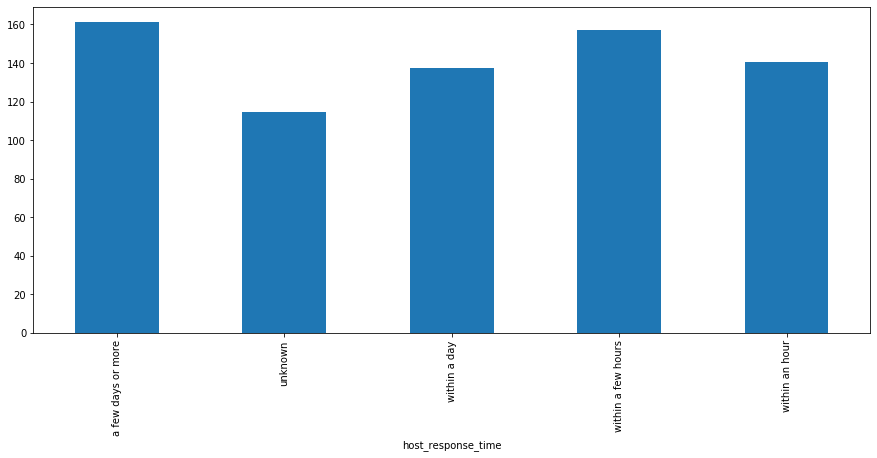

In [91]:
#host resposne time vs price
df1.groupby(['host_response_time'])['price'].apply(lambda x: x.mean()).plot(kind = 'bar', figsize = (15,6))

In [92]:
prices = pd.DataFrame({'easy_checkin':df1.groupby(['easy_checkin'])['price'].apply(lambda x: x.mean()),
                      'diability':df1.groupby(['disability'])['price'].apply(lambda x: x.mean()),
                      'accessibility':df1.groupby(['accessibility'])['price'].apply(lambda x: x.mean()),
                       'failities':df1.groupby(['facilities'])['price'].apply(lambda x: x.mean()),
                      'accessibility':df1.groupby(['accessibility'])['price'].apply(lambda x: x.mean()),
                      'safety':df1.groupby(['safety'])['price'].apply(lambda x: x.mean()),
                      'family_friendly':df1.groupby(['family_friendly'])['price'].apply(lambda x: x.mean()),
                       'technology':df1.groupby(['technology'])['price'].apply(lambda x: x.mean()),
                       'ambience':df1.groupby(['ambience'])['price'].apply(lambda x: x.mean()),
                       'home_comforts':df1.groupby(['home_comforts'])['price'].apply(lambda x: x.mean()),
                      'pet_friendly':df1.groupby(['pet_friendly'])['price'].apply(lambda x: x.mean())})

In [93]:
prices

,easy_checkin,diability,accessibility,failities,safety,family_friendly,technology,ambience,home_comforts,pet_friendly
0.0,141.920591,110.719725,131.949428,91.284483,122.385502,132.300862,124.508475,113.531684,119.019737,129.165203
1.0,131.668182,148.872463,150.528522,139.955734,150.735700,147.985061,139.434877,159.724903,140.056192,177.819246


<Figure size 1080x432 with 0 Axes>

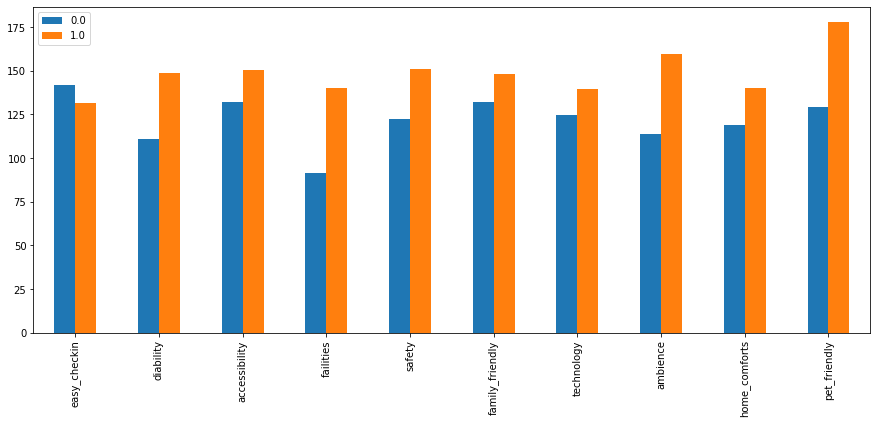

In [94]:
plt.figure(figsize = (15,6))
prices.T.plot(kind = 'bar', figsize = (15, 6))
plt.show()

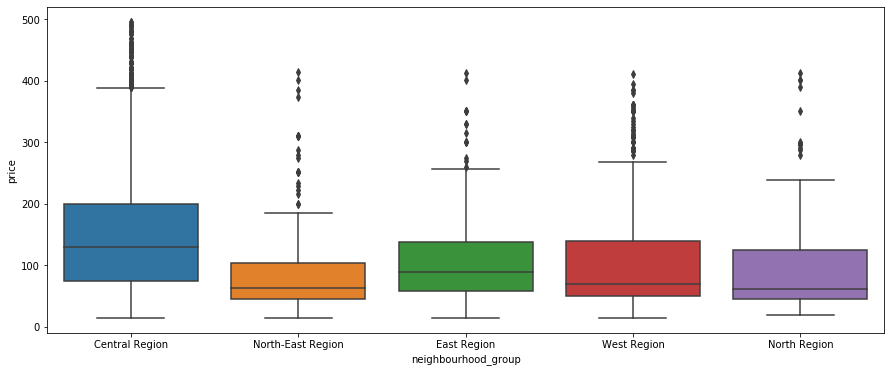

In [95]:
#checking price distribution of price in each region
plt.figure(figsize=(15,6))
sns.boxplot(x = df1.neighbourhood_group, y = df1.price)
plt.show()

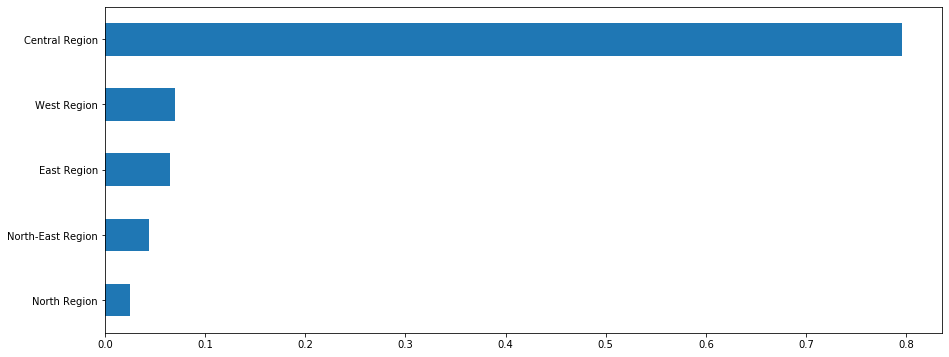

In [96]:
#percentage listing in each neighbourhood group
df1.neighbourhood_group.value_counts(normalize=True,ascending = True).plot(kind = 'barh', figsize = (15,6))

**We see that most listing are in the Central region of Singapore**

In [97]:
df1.cancellation_policy.value_counts(normalize=True)

strict      0.652722
flexible    0.207696
moderate    0.139582
Name: cancellation_policy, dtype: float64

**About 65% of the listings have a strict cancellation policy**

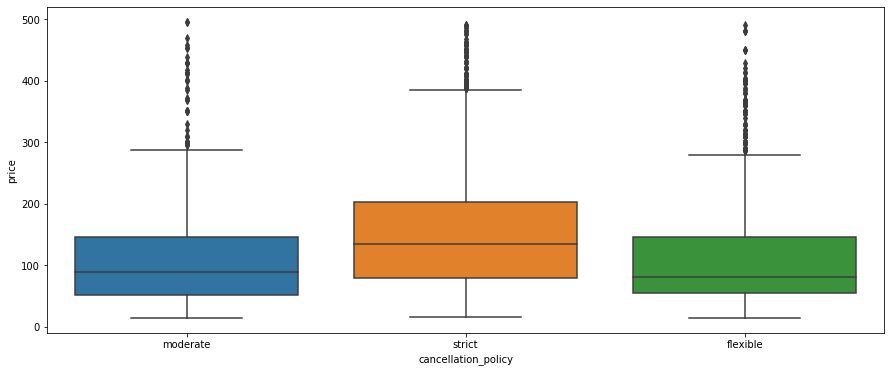

In [98]:
#box plot for cancellation policy
plt.figure(figsize = (15,6))
sns.boxplot(x = df1.cancellation_policy, y = df1.price)
plt.show()

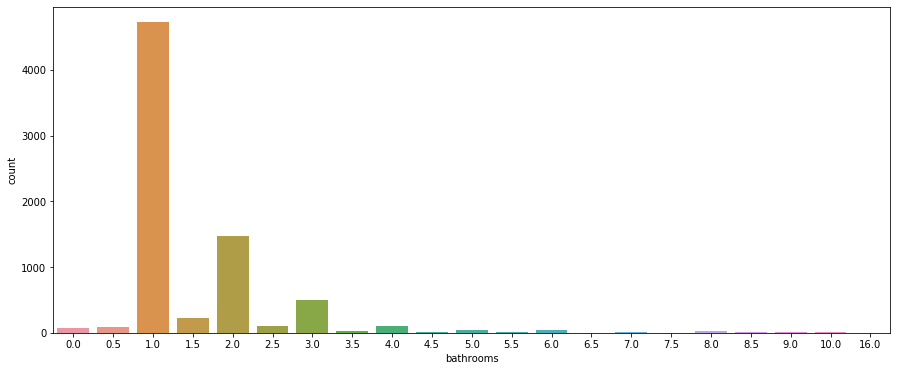

In [99]:
#count plot of bathrooms
plt.figure(figsize = (15,6))
sns.countplot(df1.bathrooms)
plt.show()

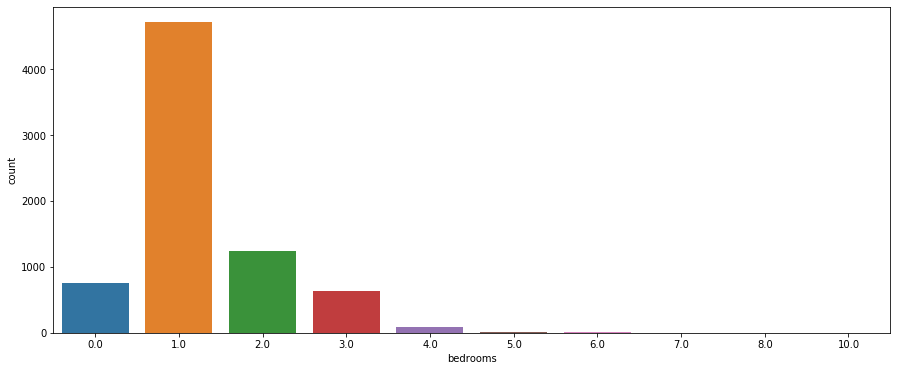

In [100]:
#Count plot of bedrooms
plt.figure(figsize = (15,6))
sns.countplot(df1.bedrooms)
plt.show()

In [101]:
#checking data types
trainx.dtypes

host_response_time        category
host_response_rate         float64
host_is_superhost         category
host_identity_verified    category
neighbourhood_group       category
latitude                   float64
longitude                  float64
is_location_exact         category
property_type             category
room_type                 category
accommodates                 int64
bathrooms                  float64
bedrooms                   float64
beds                       float64
bed_type                  category
security_deposit           float64
cleaning_fee               float64
guests_included              int64
extra_people                 int64
minimum_nights               int64
maximum_nights               int64
number_of_reviews            int64
review_scores_rating       float64
instant_bookable             int64
cancellation_policy       category
time                         int64
easy_checkin              category
disability                category
accessibility       

In [102]:
#correlationship matrix
trainx.corr()

,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,time
host_response_rate,1.000000,-0.171824,0.051846,0.127617,0.102342,0.007050,0.093634,0.028524,0.134434,0.176691,0.165735,-0.119116,0.024783,0.181508,0.006911,0.162529,-0.038564
latitude,-0.171824,1.000000,-0.036008,-0.066621,-0.086075,0.030855,-0.044500,-0.004276,-0.014620,-0.067460,-0.058518,0.095032,0.010242,-0.021707,-0.000901,-0.107442,0.013864
longitude,0.051846,-0.036008,1.000000,0.090941,0.046286,0.021047,0.045340,0.009816,-0.018881,0.100911,-0.021223,-0.045744,-0.035825,0.111387,0.014995,0.036487,0.013102
accommodates,0.127617,-0.066621,0.090941,1.000000,0.408137,0.593539,0.751006,0.082912,0.207548,0.631134,0.245872,-0.134223,0.003484,0.096098,-0.064835,0.090703,-0.123094
bathrooms,0.102342,-0.086075,0.046286,0.408137,1.000000,0.338119,0.427827,-0.024279,0.014778,0.262285,0.092979,-0.061712,0.000956,0.018283,-0.047232,0.070069,-0.012706
bedrooms,0.007050,0.030855,0.021047,0.593539,0.338119,1.000000,0.528230,0.095435,0.244293,0.595825,0.177301,-0.022682,0.000276,-0.018280,-0.042978,0.023619,-0.069551
beds,0.093634,-0.044500,0.045340,0.751006,0.427827,0.528230,1.000000,0.051383,0.135070,0.465540,0.184105,-0.094805,-0.000319,0.070882,-0.055005,0.079143,-0.103500
security_deposit,0.028524,-0.004276,0.009816,0.082912,-0.024279,0.095435,0.051383,1.000000,0.231868,0.072088,0.091295,0.171432,-0.017401,0.032173,0.048351,-0.055795,0.057400
cleaning_fee,0.134434,-0.014620,-0.018881,0.207548,0.014778,0.244293,0.135070,0.231868,1.000000,0.267008,0.289569,0.037215,-0.009318,0.002110,0.041299,0.061435,-0.001748
guests_included,0.176691,-0.067460,0.100911,0.631134,0.262285,0.595825,0.465540,0.072088,0.267008,1.000000,0.350073,-0.088624,0.014082,0.050419,-0.024054,0.148768,-0.109969


In [103]:
#dummification of train and test data
trainx = pd.get_dummies(trainx, drop_first=True)
testx = pd.get_dummies(testx, drop_first=True)

In [104]:
#checking for alignment issues
trainx.columns.difference(testx.columns)

Index([], dtype='object')

In [105]:
#checking for alignment issues
testx.columns.difference(trainx.columns)

Index([], dtype='object')

In [106]:
#writing a function to print RMSE and MAPE
from sklearn.metrics import mean_squared_error as mse
def rmse(trainy, pred_train, testy, pred_test):
    print('RMSE')
    print('Train = {}'.format(mse(trainy, pred_train)**0.5))
    print('Test = {}'.format(mse(testy, pred_test)**0.5))
    print('MAPE')
    print('Train = {}'. format( np.mean(np.abs((trainy - pred_train )/ trainy)) * 100))
    print('Test = {}'.format( np.mean(np.abs((testy - pred_test) / testy)) * 100))

In [107]:
#taking log tranformation of price
trainy1= np.log(trainy)
testy1 = np.log(testy)

In [108]:
#checking for null values
trainx.isna().sum()

host_response_rate                       0
latitude                                 0
longitude                                0
accommodates                             0
bathrooms                                0
bedrooms                                 0
beds                                     0
security_deposit                         0
cleaning_fee                             0
guests_included                          0
extra_people                             0
minimum_nights                           0
maximum_nights                           0
number_of_reviews                        0
review_scores_rating                     0
instant_bookable                         0
time                                     0
host_response_time_unknown               0
host_response_time_within a day          0
host_response_time_within a few hours    0
host_response_time_within an hour        0
host_is_superhost_1                      0
host_identity_verified_1                 0
neighbourho

## Model Bulding

In [109]:
#importing required classes from sklearn
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_learning_curves

## Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
parameters = {'max_depth':range(1,15),'min_samples_split':range(10,50,10)}
dtr_grid = GridSearchCV(DecisionTreeRegressor(random_state = 123), param_grid=parameters, cv = 5, n_jobs=-1, scoring = 'neg_mean_squared_error')
dtr_grid.fit(trainx, trainy1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=123,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_split': range(10, 50, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [112]:
dtr_grid.best_params_

{'max_depth': 11, 'min_samples_split': 40}

In [113]:
dtr_grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

In [114]:
rmse(trainy, np.exp(dtr_grid.best_estimator_.predict(trainx)), testy, np.exp(dtr_grid.best_estimator_.predict(testx)))

RMSE
Train = 43.36323349792916
Test = 52.611352903335906
MAPE
Train = 21.722965566485623
Test = 30.591234374828012


In [115]:
from mlxtend.plotting import plot_learning_curves

([0.11074969770144932,
  0.1083497998889012,
  0.09846877749813161,
  0.09431214823089033,
  0.09736228176057592,
  0.0934081016943479,
  0.09120649599828791,
  0.09225586433067018,
  0.09181874576044419,
  0.08838399652706935],
 [0.20646652186229145,
  0.1978037789876178,
  0.1677120531280146,
  0.15817344963371394,
  0.1544511617129329,
  0.15343263326602755,
  0.15347440947531255,
  0.15013954227407006,
  0.1512613693344515,
  0.149321770462689])

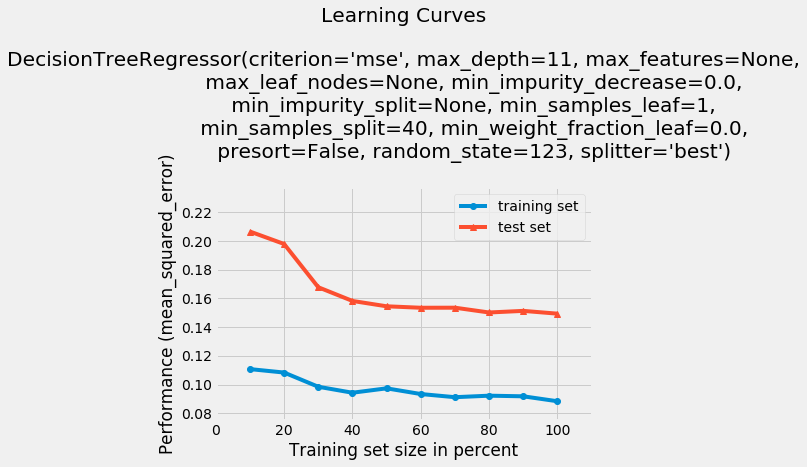

In [116]:
plot_learning_curves(trainx, trainy1, testx, testy1, dtr_grid.best_estimator_, scoring='mean_squared_error')

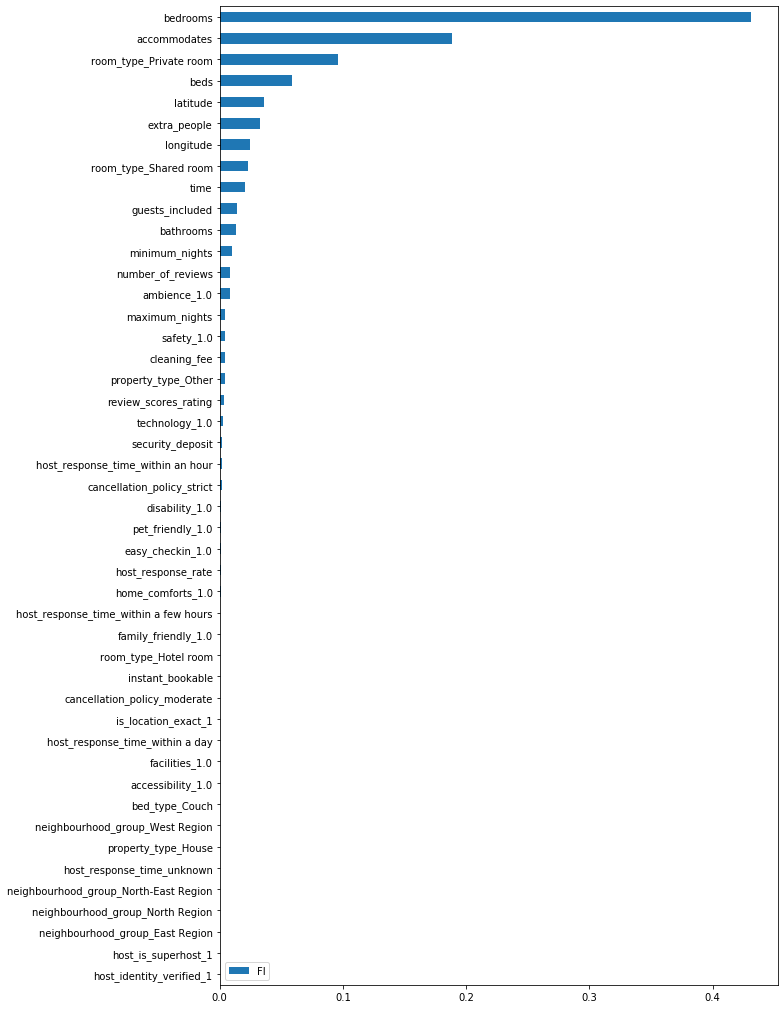

In [117]:
#feature importance
dtc_fi = pd.DataFrame(dtr_grid.best_estimator_.feature_importances_, index = trainx.columns, columns=['FI'])
dtc_fi.sort_values(by=['FI'], ascending=True).plot(kind = 'barh', figsize = (10,18))

In [118]:
dtc_fi.sort_values(by=['FI'], ascending=False).index

Index(['bedrooms', 'accommodates', 'room_type_Private room', 'beds',
       'latitude', 'extra_people', 'longitude', 'room_type_Shared room',
       'time', 'guests_included', 'bathrooms', 'minimum_nights',
       'number_of_reviews', 'ambience_1.0', 'maximum_nights', 'safety_1.0',
       'cleaning_fee', 'property_type_Other', 'review_scores_rating',
       'technology_1.0', 'security_deposit',
       'host_response_time_within an hour', 'cancellation_policy_strict',
       'disability_1.0', 'pet_friendly_1.0', 'easy_checkin_1.0',
       'host_response_rate', 'home_comforts_1.0',
       'host_response_time_within a few hours', 'family_friendly_1.0',
       'room_type_Hotel room', 'instant_bookable',
       'cancellation_policy_moderate', 'is_location_exact_1',
       'accessibility_1.0', 'host_response_time_unknown',
       'host_response_time_within a day', 'facilities_1.0',
       'host_is_superhost_1', 'property_type_House',
       'host_identity_verified_1', 'bed_type_Couch',
     

In [119]:
#feature selection
drop_cols2 = ['maximum_nights', 'ambience_1.0', 'number_of_reviews',
       'instant_bookable', 'minimum_nights', 'neighbourhood_group_West Region',
       'host_is_superhost_1', 'cancellation_policy_moderate',
       'security_deposit', 'review_scores_rating', 'family_friendly_1.0',
       'host_response_time_unknown', 'easy_checkin_1.0', 'is_location_exact_1',
       'host_response_rate', 'property_type_Other',
       'cancellation_policy_strict', 'facilities_1.0', 'room_type_Hotel room',
       'host_response_time_within a day',
       'host_response_time_within a few hours', 'technology_1.0',
       'host_response_time_within an hour', 'safety_1.0', 'disability_1.0',
       'accessibility_1.0', 'host_identity_verified_1',
       'neighbourhood_group_North Region',
       'neighbourhood_group_North-East Region', 'bed_type_Couch',
       'property_type_House', 'neighbourhood_group_East Region']

In [120]:
trainx_dtr = trainx.drop(drop_cols2, axis = 1)
testx_dtr = testx.drop(drop_cols2, axis = 1)
dtr_grid.best_estimator_.fit(trainx_dtr, trainy1)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

In [121]:
rmse(trainy, np.exp(dtr_grid.best_estimator_.predict(trainx_dtr)), testy, np.exp(dtr_grid.best_estimator_.predict(testx_dtr)))

RMSE
Train = 44.97141219877053
Test = 52.66998070641284
MAPE
Train = 23.18631734064979
Test = 31.58845815949337


([0.11074969770144932,
  0.1083497998889012,
  0.09846877749813161,
  0.09431214823089033,
  0.09736228176057592,
  0.0934081016943479,
  0.09120649599828791,
  0.09225586433067018,
  0.09181874576044419,
  0.08838399652706935],
 [0.20646652186229145,
  0.1978037789876178,
  0.1677120531280146,
  0.15817344963371394,
  0.1544511617129329,
  0.15343263326602755,
  0.15347440947531255,
  0.15013954227407006,
  0.1512613693344515,
  0.149321770462689])

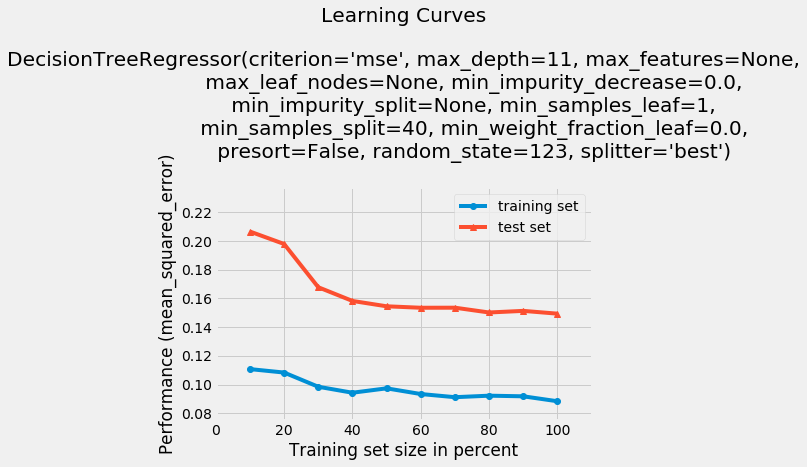

In [122]:
plot_learning_curves(trainx, trainy1, testx, testy1, dtr_grid.best_estimator_, scoring='mean_squared_error')

## Boosting Decision Tree

In [123]:
#importing adaboost from sklearn
from sklearn.ensemble import AdaBoostRegressor

In [124]:
AdaBoostRegressor()

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [125]:
#defining parameters from gridsearch
parameters = {'loss':['linear', 'square', 'exponential'],'learning_rate':[0.001, 0.01,0.1,1,10], 
              'n_estimators':range(100,300,20)}

In [126]:
#difing grid serach class
dtr_boost = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth = 2)), param_grid= parameters, cv = 5, n_jobs=-1)
dtr_boost.fit(trainx, trainy1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                              max_depth=2,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min_weight_fraction_leaf=0.0,
                                                     

In [127]:
#best parameters for adaboost
dtr_boost.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 120}

In [128]:
#rmse and mape values
rmse(trainy, np.exp(dtr_boost.best_estimator_.predict(trainx)), testy, np.exp(dtr_boost.best_estimator_.predict(testx)))

RMSE
Train = 66.92811918329028
Test = 63.22668940112839
MAPE
Train = 39.910687649509526
Test = 40.203232613568446


([0.2299763332649707,
  0.21296050249768678,
  0.20641874652662023,
  0.21230760630634812,
  0.2207771729606121,
  0.21769778278291024,
  0.22350882271671368,
  0.22206603294067598,
  0.2251830149521435,
  0.22369360837026908],
 [0.22873366321127303,
  0.2089769412828086,
  0.2003415668918921,
  0.20719203474136272,
  0.21561185598773255,
  0.21109507431170524,
  0.22080840859093245,
  0.2180256276940038,
  0.21785580988235587,
  0.21640091465680877])

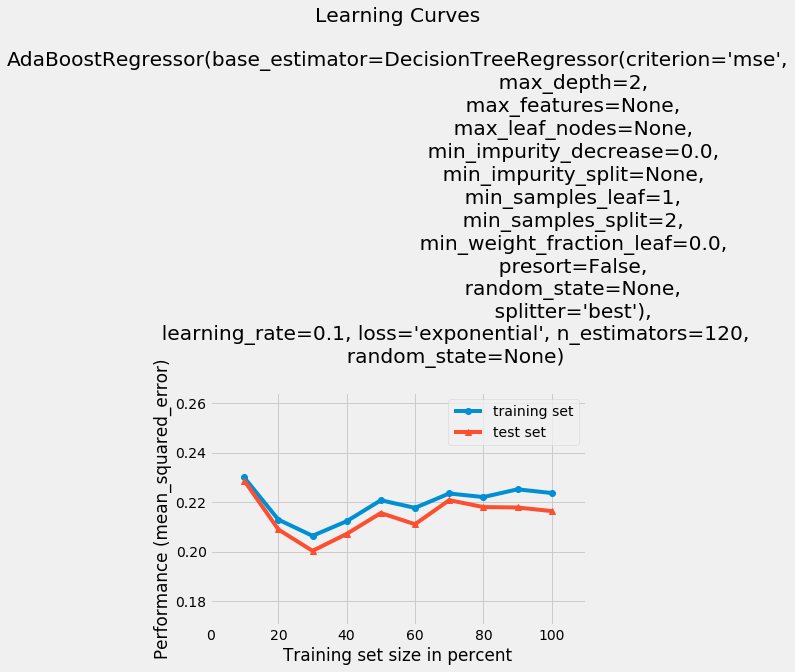

In [129]:
#learning curves 
plot_learning_curves(trainx, trainy1, testx, testy1, dtr_boost.best_estimator_, scoring='mean_squared_error',)

## Random Forest

Random forest is an ensemble method which reduces the problem of high variance

In [130]:
#importing required class from sklearn
from sklearn.ensemble import RandomForestRegressor 

In [131]:
#defining grid search parameters
parameters = {'max_depth':range(1,15), 'n_estimators':range(100,200,10), 
              'min_samples_split':range(10,50,10)}

In [132]:
#grid search for random forest
rfr_grid = GridSearchCV(RandomForestRegressor(random_state = 123), param_grid=parameters, cv = 5, n_jobs=-1)
rfr_grid.fit(trainx, trainy1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
       

In [133]:
#best parameters of random forest
rfr_grid.best_params_

{'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 190}

In [134]:
#best parameter for random forest
best_parameter = {'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 190}

In [135]:
rf = RandomForestRegressor(**best_parameter)

In [136]:
rf = RandomForestRegressor(**best_parameter)
rf.fit(trainx, trainy1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=190,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [137]:
#RMSE and MAPE
rmse(trainy, np.exp(rf.predict(trainx)), testy, np.exp(rf.predict(testx)))

RMSE
Train = 30.542015240293846
Test = 41.40581450899269
MAPE
Train = 13.386541302274052
Test = 23.025278284813183


In [138]:
#dataframe containing feature importance
imp_df = pd.DataFrame(rf.feature_importances_, index=trainx.columns)

([0.05058716099455799,
  0.04425944347643843,
  0.03924644378100846,
  0.03795379463613854,
  0.036944181373891244,
  0.03726978136401618,
  0.036645733758643224,
  0.0374506113554212,
  0.03774023075177685,
  0.03699832252045406],
 [0.14275711898917384,
  0.12952538361976304,
  0.11492191848077975,
  0.11126064759526287,
  0.10765242644898448,
  0.10559197770827977,
  0.10492675948016701,
  0.10130925582021637,
  0.10008788790463242,
  0.09854037748917928])

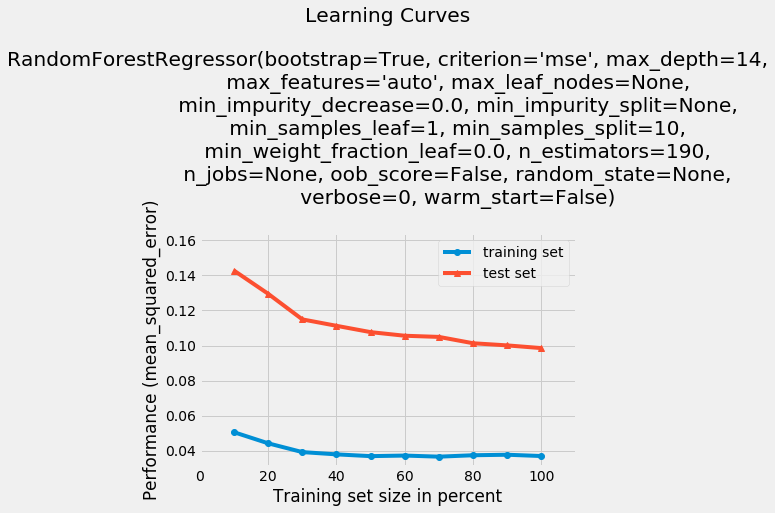

In [139]:
#plotting learning curve for random forest
plot_learning_curves(trainx, trainy1, testx, testy1, rf, scoring='mean_squared_error')

In [140]:
imp_df.columns = ['FI']

In [141]:
#sorting feature importance values
imp_df.sort_values('FI', ascending=False).index

Index(['bedrooms', 'accommodates', 'room_type_Private room', 'latitude',
       'beds', 'longitude', 'extra_people', 'time', 'room_type_Shared room',
       'bathrooms', 'minimum_nights', 'guests_included', 'number_of_reviews',
       'cleaning_fee', 'review_scores_rating', 'maximum_nights',
       'ambience_1.0', 'security_deposit', 'host_response_rate',
       'property_type_Other', 'safety_1.0', 'property_type_House',
       'cancellation_policy_strict', 'home_comforts_1.0', 'pet_friendly_1.0',
       'disability_1.0', 'instant_bookable',
       'host_response_time_within an hour', 'cancellation_policy_moderate',
       'family_friendly_1.0', 'accessibility_1.0', 'is_location_exact_1',
       'host_response_time_unknown', 'host_identity_verified_1',
       'technology_1.0', 'easy_checkin_1.0', 'room_type_Hotel room',
       'host_response_time_within a day', 'host_is_superhost_1',
       'host_response_time_within a few hours',
       'neighbourhood_group_North-East Region',
       

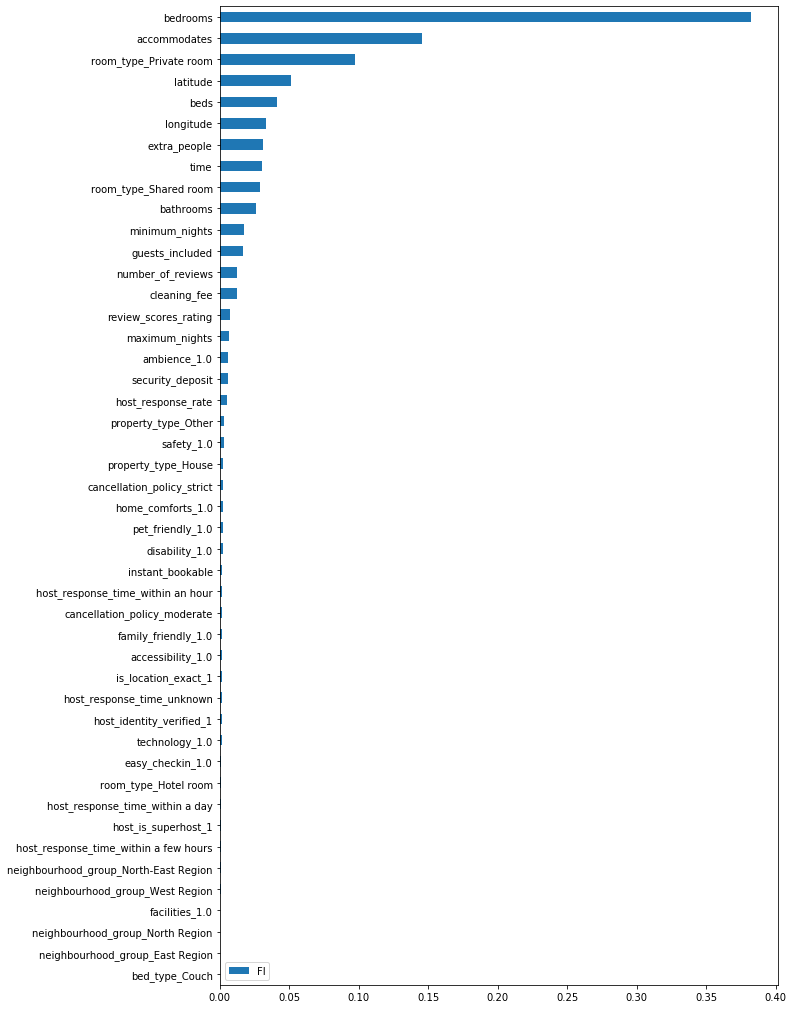

In [142]:
#plotting feature importance values
imp_df.sort_values('FI', ascending=True).plot(kind='barh', figsize=(10,18))

In [143]:
#dropping redundant columns
drop_cols2 = ['property_type_Other', 'disability_1.0', 'cancellation_policy_strict',
       'safety_1.0', 'property_type_House', 'pet_friendly_1.0',
       'home_comforts_1.0', 'instant_bookable',
       'host_response_time_within an hour', 'cancellation_policy_moderate',
       'accessibility_1.0', 'is_location_exact_1', 'family_friendly_1.0',
       'host_response_time_unknown', 'technology_1.0', 'easy_checkin_1.0',
       'host_identity_verified_1', 'room_type_Hotel room',
       'host_response_time_within a few hours', 'host_is_superhost_1',
       'host_response_time_within a day', 'neighbourhood_group_North-East Region',
       'neighbourhood_group_West Region', 'facilities_1.0',
       'neighbourhood_group_North Region', 'neighbourhood_group_East Region',
       'bed_type_Couch']

In [144]:
trainx_rf = trainx.drop(drop_cols2, axis = 1)
testx_rf = testx.drop(drop_cols2, axis = 1)

In [145]:
#training the model
rf.fit(trainx_rf, trainy1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=190,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [146]:
#printing RMSE and MAPE values
rmse(trainy, np.exp(rf.predict(trainx_rf)), testy, np.exp(rf.predict(testx_rf)))

RMSE
Train = 31.197570843246837
Test = 41.91266357510049
MAPE
Train = 13.812277543696844
Test = 23.428313071078318


([0.05336467365328345,
  0.04591619490295124,
  0.041317373103123896,
  0.03931068435138719,
  0.03839642627947794,
  0.03904732662978638,
  0.03832309853277394,
  0.03928269665480611,
  0.039512430143259426,
  0.03921986203353266],
 [0.14249668722004571,
  0.12967610489491713,
  0.11679011079837116,
  0.1126641815836166,
  0.10896312237963851,
  0.10937132408217111,
  0.10706739002302501,
  0.10445002645723481,
  0.1028107622805431,
  0.10131344117822982])

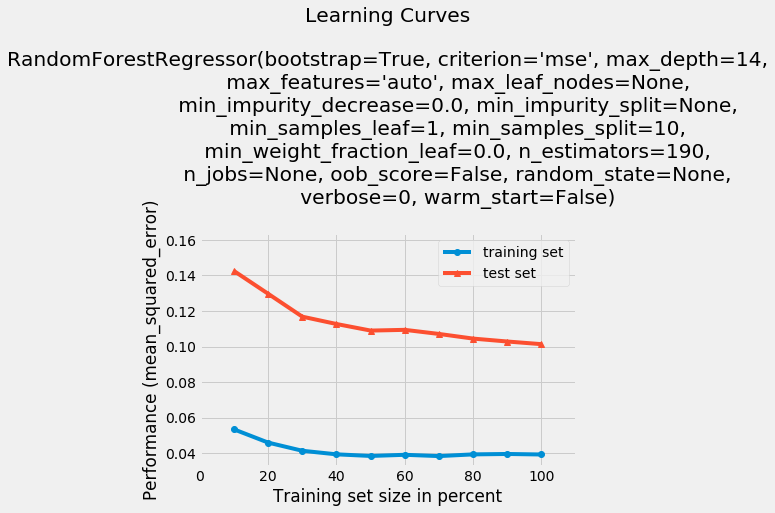

In [147]:
#plotting learning curves
plot_learning_curves(trainx_rf, trainy1, testx_rf, testy1, rf, scoring='mean_squared_error')

Boosting methods are used to address high bias probelm. The boosting techniques used are:
1. Lightgbm
2. XG boosting
3. Gradient Boosting

## Lightgbm

In [148]:
#importing class LGBMRegressor from lightgbm package
from lightgbm.sklearn import LGBMRegressor
parameters = {'n_estimators': range(100,300,10), 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'max_depth':[3]}

In [149]:
#performing grid search with corss validation
lgbm_grid = GridSearchCV(LGBMRegressor(n_jobs = -1, random_state = 123), param_grid=parameters, cv = 5,n_jobs=-1)

In [150]:
#fitting the model
lgbm_grid.fit(trainx, trainy1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=123,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [3],
                         'n_estimators': range(100, 300, 10)}

In [151]:
#Best paramters
lgbm_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 290}

In [152]:
lgbm_grid.best_estimator_.feature_importances_

array([ 36, 181, 189, 116,  54,  63,  52,  50, 128,  49, 117,  87,  36,
        77,  45,  15, 169,  17,   3,  10,   4,   5,  12,   0,   7,   9,
         0,   7,  19,  16,  41,  40,  29,   0,  14,  14,   5,   9,   2,
         3,  13,  12,   0,  23,  28,   1])

In [153]:
#checking RMSE and MAPE
rmse(trainy, np.exp(lgbm_grid.predict(trainx)), testy,np.exp(lgbm_grid.predict(testx)))

RMSE
Train = 40.72929454902912
Test = 42.67529956873131
MAPE
Train = 19.636409420552773
Test = 23.898061611768043


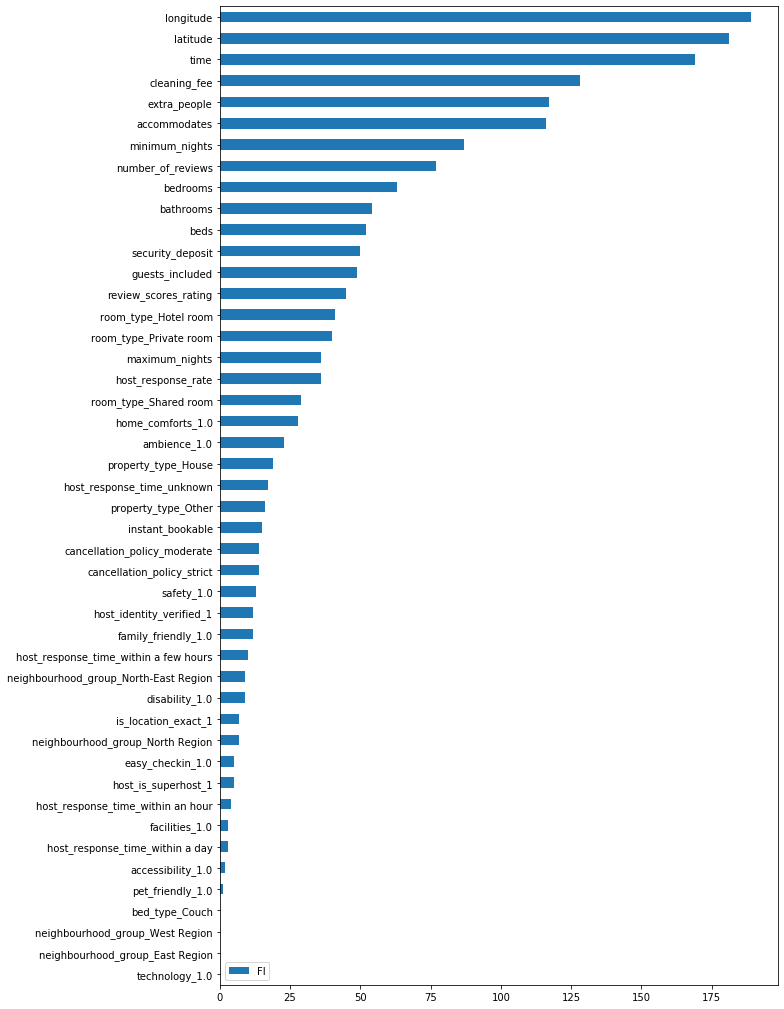

In [154]:
#feature importance
imp_fi = pd.DataFrame(lgbm_grid.best_estimator_.feature_importances_, index = trainx.columns, columns=['FI'])
imp_fi.sort_values('FI', ascending=True).plot(kind='barh', figsize=(10,18))

In [155]:
imp_fi.sort_values('FI', ascending=False).index

Index(['longitude', 'latitude', 'time', 'cleaning_fee', 'extra_people',
       'accommodates', 'minimum_nights', 'number_of_reviews', 'bedrooms',
       'bathrooms', 'beds', 'security_deposit', 'guests_included',
       'review_scores_rating', 'room_type_Hotel room',
       'room_type_Private room', 'host_response_rate', 'maximum_nights',
       'room_type_Shared room', 'home_comforts_1.0', 'ambience_1.0',
       'property_type_House', 'host_response_time_unknown',
       'property_type_Other', 'instant_bookable', 'cancellation_policy_strict',
       'cancellation_policy_moderate', 'safety_1.0',
       'host_identity_verified_1', 'family_friendly_1.0',
       'host_response_time_within a few hours',
       'neighbourhood_group_North-East Region', 'disability_1.0',
       'is_location_exact_1', 'neighbourhood_group_North Region',
       'host_is_superhost_1', 'easy_checkin_1.0',
       'host_response_time_within an hour', 'host_response_time_within a day',
       'facilities_1.0', 'acce

([0.03601159734934322,
  0.045248821056157316,
  0.05041395381774122,
  0.05584024617020815,
  0.05964171372927919,
  0.06290346909662022,
  0.06604420542677024,
  0.06862002014903569,
  0.07204412985974373,
  0.07385247188714456],
 [0.14274865305479673,
  0.12540065037975706,
  0.10761254042649757,
  0.10311183236760052,
  0.1017626478287638,
  0.10206854456117763,
  0.10195039345876307,
  0.10038531810683683,
  0.09898343265985414,
  0.09984545064444739])

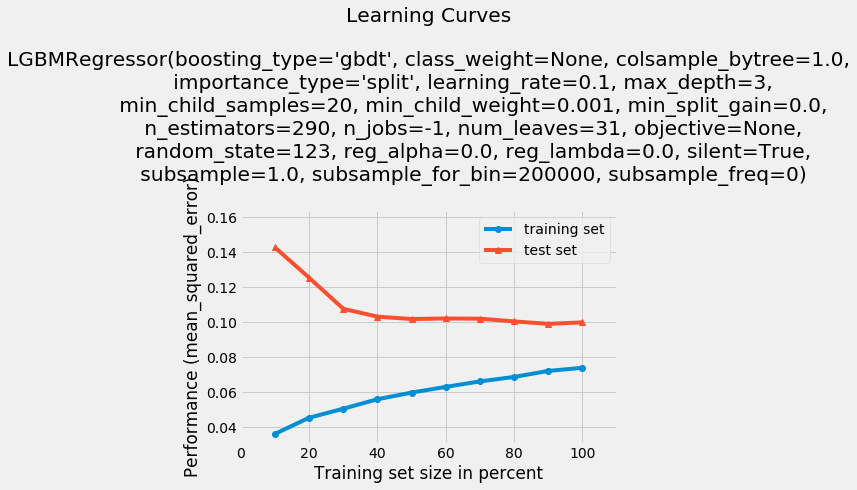

In [156]:
plot_learning_curves(trainx, trainy1, testx, testy1, lgbm_grid.best_estimator_, scoring='mean_squared_error')

In [157]:
#feature selection
drop_cols2 = ['neighbourhood_group_East Region',
       'pet_friendly_1.0', 'accessibility_1.0',
        'technology_1.0', 'bed_type_Couch',
       'neighbourhood_group_West Region']

In [158]:
trainx_lgbm = trainx.drop(drop_cols2, axis = 1)
testx_lgbm = testx.drop(drop_cols2, axis = 1)

In [159]:
lgbm_grid.best_estimator_.fit(trainx_lgbm, trainy1)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=290, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [160]:
rmse(trainy, np.exp(lgbm_grid.predict(trainx_lgbm)), testy,np.exp(lgbm_grid.predict(testx_lgbm)))

RMSE
Train = 40.906972308319595
Test = 42.70506255971374
MAPE
Train = 19.625241028397447
Test = 23.90272619151039


([0.035828229943449426,
  0.04606824561039214,
  0.049446529404472035,
  0.05563026637671265,
  0.05979536366802027,
  0.0632061950611265,
  0.06639500115372135,
  0.06901546279407093,
  0.07192016370633669,
  0.07384645927849291],
 [0.14130485029537745,
  0.12253960712723416,
  0.10612363886741,
  0.10307184305617557,
  0.10228469519015299,
  0.10133333466558775,
  0.1022400154913262,
  0.10086804062790546,
  0.09785339609319854,
  0.09987627410187035])

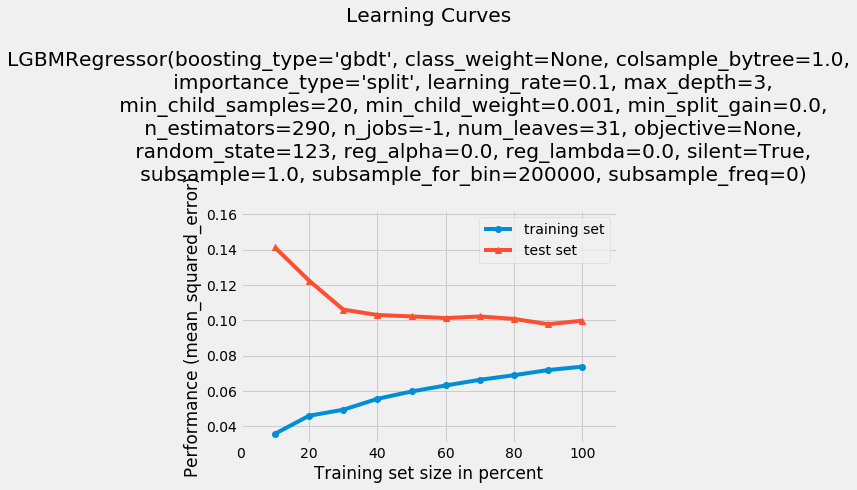

In [161]:
plot_learning_curves(trainx_lgbm, trainy1, testx_lgbm, testy1, lgbm_grid.best_estimator_, scoring='mean_squared_error')

## XGBoost

In [162]:
from xgboost.sklearn import XGBRegressor

In [163]:
#training the model
xgb = XGBRegressor(max_depth = 4, n_estimators = 300,objective='reg:squarederror', random_state = 123,
                  colsamplebylevel  = 0.7, colsample_bytree= 0.7)
xgb.fit(trainx, trainy1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, colsamplebylevel=0.7,
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=300, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [164]:
#Checking RMSE and MAPE
rmse(trainy, np.exp(xgb.predict(trainx)), testy, np.exp(xgb.predict(testx)))

RMSE
Train = 33.67050007099507
Test = 40.80229200440929
MAPE
Train = 15.838073220999908
Test = 22.896622575402507


([0.004456869390384863,
  0.015469249659030846,
  0.022576515688829336,
  0.027328204991369297,
  0.033381029452162654,
  0.036247485988188985,
  0.04029655137978624,
  0.04379883729173824,
  0.046797680230368545,
  0.04885267183159357],
 [0.1397517256354097,
  0.12514132463023367,
  0.10640569425354546,
  0.10176260546312364,
  0.10164478781997618,
  0.09991251198967233,
  0.09829051767090893,
  0.0953322912374011,
  0.09331394864726739,
  0.09388408591410932])

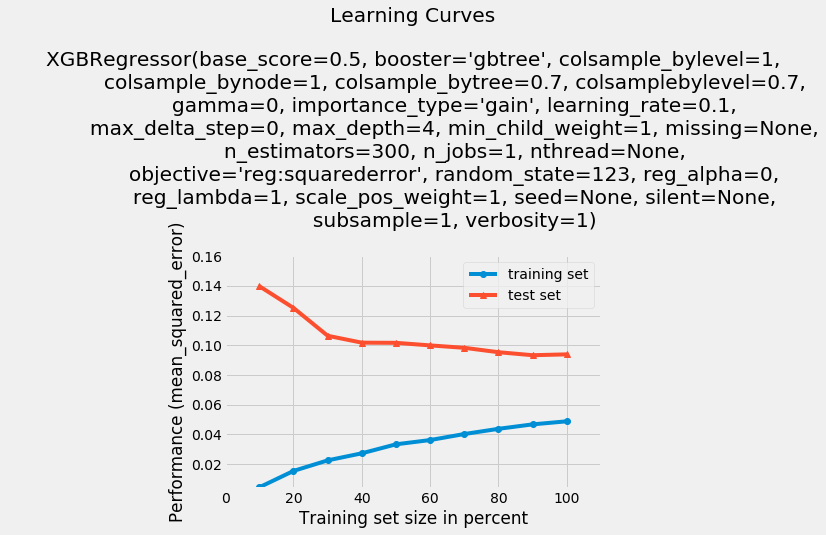

In [165]:
plot_learning_curves(trainx, trainy1, testx, testy1, xgb, scoring='mean_squared_error')

In [166]:
#checking for feature importance
imp_xgb = pd.DataFrame(xgb.feature_importances_, index=trainx.columns, columns=['FI'])

In [167]:
imp_xgb.sort_values('FI', ascending=False).index

Index(['bedrooms', 'room_type_Private room', 'room_type_Shared room',
       'accommodates', 'guests_included', 'ambience_1.0', 'beds',
       'disability_1.0', 'room_type_Hotel room', 'bathrooms', 'cleaning_fee',
       'extra_people', 'home_comforts_1.0', 'cancellation_policy_moderate',
       'host_response_time_within an hour', 'minimum_nights', 'safety_1.0',
       'technology_1.0', 'latitude', 'time', 'host_response_time_unknown',
       'family_friendly_1.0', 'number_of_reviews', 'property_type_House',
       'longitude', 'review_scores_rating', 'instant_bookable',
       'property_type_Other', 'neighbourhood_group_North-East Region',
       'host_identity_verified_1', 'host_is_superhost_1',
       'neighbourhood_group_North Region', 'security_deposit',
       'maximum_nights', 'pet_friendly_1.0', 'accessibility_1.0',
       'cancellation_policy_strict', 'neighbourhood_group_East Region',
       'facilities_1.0', 'host_response_time_within a few hours',
       'host_response_rat

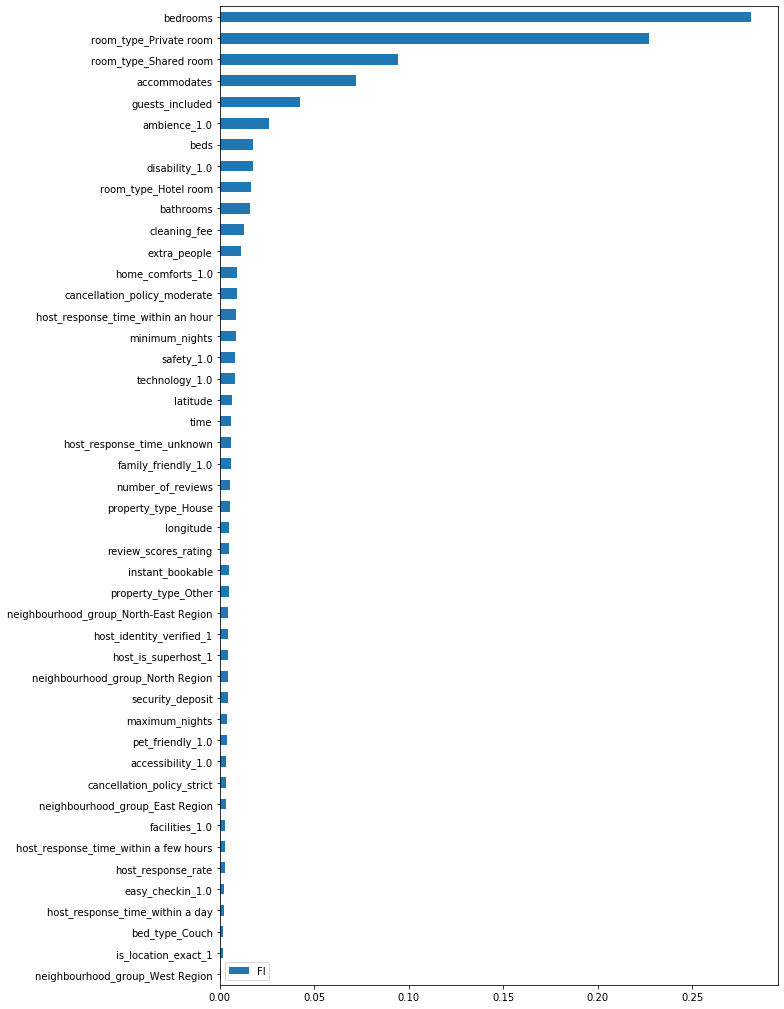

In [168]:
imp_xgb.sort_values('FI', ascending=True).plot(kind = 'barh', figsize = (10,18))

## Gradient Boosting

In [169]:
from sklearn.ensemble import GradientBoostingRegressor

In [170]:
#fitting the model
gbr = GradientBoostingRegressor(max_depth=4,n_estimators=200, random_state=123)
gbr.fit(trainx, trainy1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [171]:
rmse(trainy, np.exp(gbr.predict(trainx)), testy, np.exp(gbr.predict(testx)))

RMSE
Train = 35.57642843524247
Test = 40.970155180531734
MAPE
Train = 17.125896637256982
Test = 23.300913975342436


([0.006452121267974628,
  0.019007147641266004,
  0.027546215847180644,
  0.032511052929560476,
  0.03891124784637842,
  0.04215845950276145,
  0.046351764596341445,
  0.04915961053206688,
  0.05358038510915646,
  0.05468605195682311],
 [0.1416956256263442,
  0.12686928611515483,
  0.11338251491699744,
  0.10491195591634972,
  0.10179128137511856,
  0.10067530134864773,
  0.1007868213938095,
  0.09923154663959063,
  0.09730579644015673,
  0.09559635551886829])

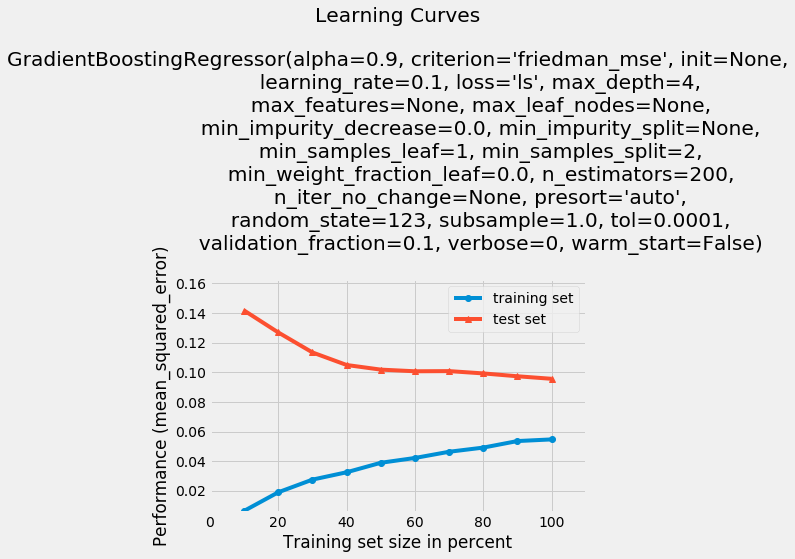

In [172]:
plot_learning_curves(trainx, trainy1, testx, testy1, gbr, scoring='mean_squared_error')

In [173]:
#feature importance
imp_gbr = pd.DataFrame(gbr.feature_importances_, index=trainx.columns, columns=['FI'])

In [174]:
imp_gbr.sort_values('FI', ascending=False).index

Index(['bedrooms', 'accommodates', 'room_type_Private room', 'latitude',
       'room_type_Shared room', 'extra_people', 'beds', 'longitude',
       'guests_included', 'cleaning_fee', 'time', 'bathrooms',
       'minimum_nights', 'ambience_1.0', 'number_of_reviews',
       'room_type_Hotel room', 'review_scores_rating', 'maximum_nights',
       'security_deposit', 'host_response_rate', 'home_comforts_1.0',
       'safety_1.0', 'property_type_House', 'cancellation_policy_moderate',
       'host_response_time_unknown', 'family_friendly_1.0', 'disability_1.0',
       'host_response_time_within an hour', 'host_identity_verified_1',
       'cancellation_policy_strict', 'property_type_Other', 'instant_bookable',
       'host_is_superhost_1', 'neighbourhood_group_North-East Region',
       'pet_friendly_1.0', 'technology_1.0', 'host_response_time_within a day',
       'facilities_1.0', 'bed_type_Couch', 'is_location_exact_1',
       'accessibility_1.0', 'easy_checkin_1.0',
       'neighbourho

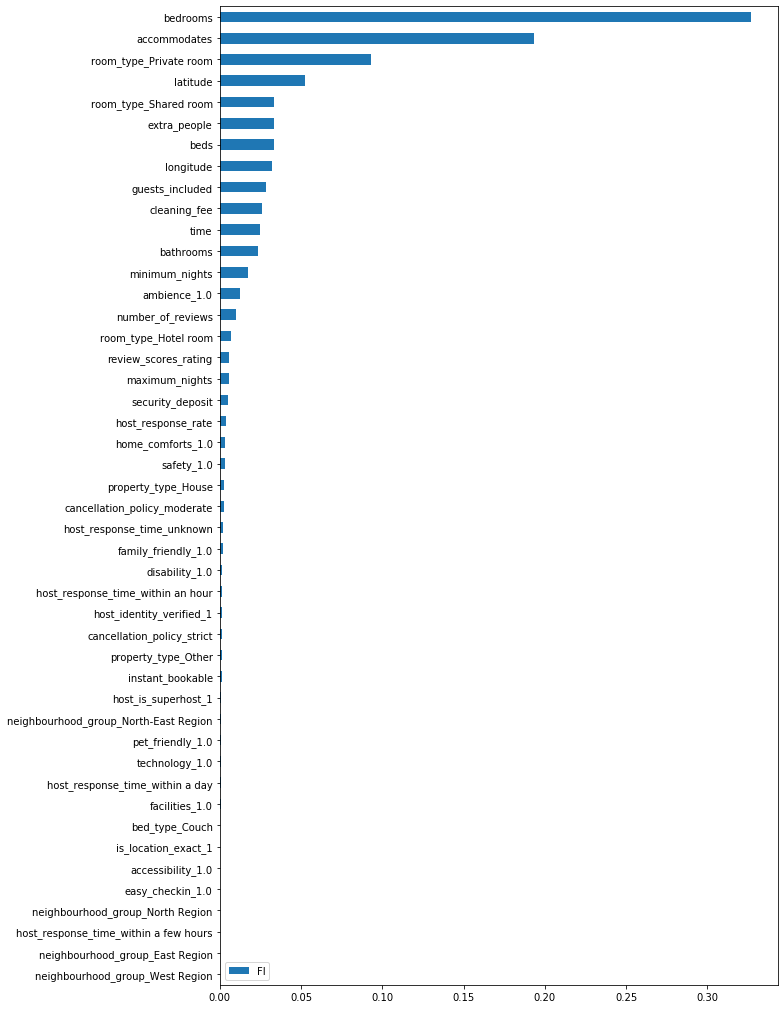

In [175]:
imp_gbr.sort_values('FI', ascending=True).plot(kind = 'barh', figsize = (10,18))

In [176]:
#feature selection
drop_cols2 = ['maximum_nights',
       'home_comforts_1.0', 'room_type_Hotel room', 'property_type_Other', 'safety_1.0',
       'instant_bookable', 'disability_1.0', 'host_is_superhost_1',
       'family_friendly_1.0', 'property_type_House',
       'neighbourhood_group_North-East Region', 'cancellation_policy_strict',
       'host_response_time_within an hour', 'host_identity_verified_1',
       'cancellation_policy_moderate', 'accessibility_1.0',
       'host_response_time_within a day', 'host_response_time_unknown',
       'pet_friendly_1.0', 'easy_checkin_1.0',
       'host_response_time_within a few hours', 'is_location_exact_1',
       'technology_1.0', 'neighbourhood_group_West Region', 'bed_type_Couch',
       'neighbourhood_group_East Region', 'facilities_1.0',
       'neighbourhood_group_North Region']

In [177]:
trainx_gbr = trainx.drop(drop_cols2, axis = 1)
testx_gbr = testx.drop(drop_cols2, axis = 1)

In [178]:
gbr.fit(trainx_gbr, trainy1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [179]:
rmse(trainy, np.exp(gbr.predict(trainx_gbr)), testy, np.exp(gbr.predict(testx_gbr)))

RMSE
Train = 36.643554537799034
Test = 42.786202696207745
MAPE
Train = 17.82867565330401
Test = 24.000412331698794


([0.007243732364843008,
  0.02250786626296005,
  0.031489456258617605,
  0.03723269350006371,
  0.04283877574340023,
  0.04814609155281537,
  0.05097179236399026,
  0.054596274903854436,
  0.059382899163578286,
  0.06044030045615977],
 [0.14432593862708165,
  0.13038444965363896,
  0.11452508990745933,
  0.10764263454345091,
  0.10134052030817034,
  0.10202810491365755,
  0.10085137026152513,
  0.1015389627257105,
  0.10176931157830793,
  0.10105623725377402])

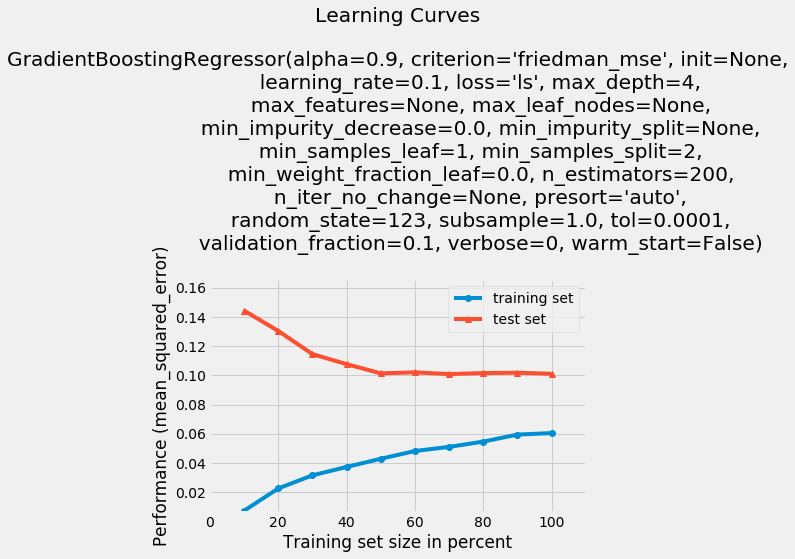

In [180]:
plot_learning_curves(trainx_gbr, trainy1, testx_gbr, testy1, gbr, scoring='mean_squared_error')

In [181]:
#error on prediction 
((trainy-trainy.median())**2).mean()**0.5

96.21694038400014

In [182]:
#error on test
((testy-trainy.median())**2).mean()**0.5

94.22389816181384

In [183]:
trainx_scaled = trainx.copy()
testx_scaled = testx.copy()

## Elastic Net

In [184]:
from sklearn.linear_model import ElasticNet
parameters = {'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
els_grid = GridSearchCV(ElasticNet(), param_grid=parameters, cv = 5, n_jobs=-1)
els_grid.fit(trainx, trainy1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [185]:
#best parameter obtained from grid search
els_grid.best_params_

{'l1_ratio': 0.1}

In [186]:
#printing RMSE and MAPE values for train and test
rmse(trainy1, els_grid.best_estimator_.predict(trainx), testy1, els_grid.best_estimator_.predict(testx))

RMSE
Train = 0.5554900168251887
Test = 0.5591636813267745
MAPE
Train = 9.656207944819048
Test = 9.78210285682701


In [187]:
#printing RMSE and MAPE values for train and test
rmse(trainy, np.exp(els_grid.best_estimator_.predict(trainx)), testy, np.exp(els_grid.best_estimator_.predict(testx)))

RMSE
Train = 80.12569920355372
Test = 76.1236692624084
MAPE
Train = 51.51669871456407
Test = 52.89445053619772


([0.33097502801348855,
  0.33326738173771386,
  0.3230810222376942,
  0.31528186448434864,
  0.31497663228661155,
  0.3119391783003113,
  0.3043780861822307,
  0.30509932749441315,
  0.30519399391695146,
  0.3085691587924484],
 [0.3233470796852225,
  0.33542703894333525,
  0.3270398447777595,
  0.320874021878733,
  0.3233964799982171,
  0.321008289181736,
  0.31462130214162265,
  0.3146955177490141,
  0.3137531669278221,
  0.3126640225149106])

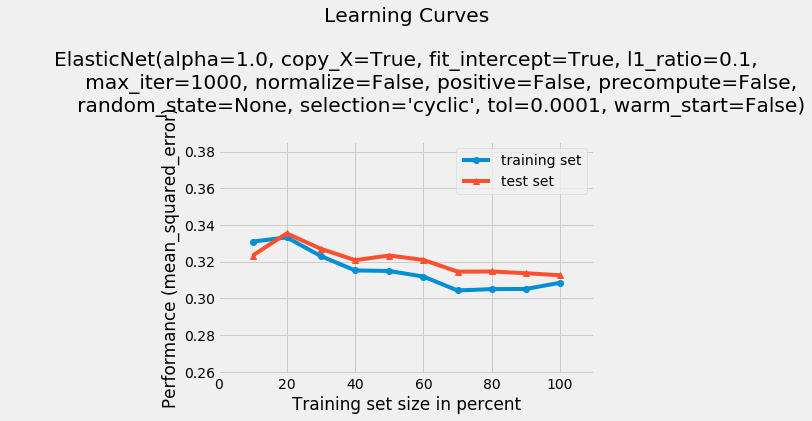

In [188]:
#plotting learning curves
plot_learning_curves(trainx, trainy1, testx, testy1, els_grid.best_estimator_, scoring='mean_squared_error')

## Lasso Regression

In [189]:
from sklearn.linear_model import Lasso

In [190]:
ls = Lasso()

In [191]:
ls.fit(trainx, trainy1)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [192]:
rmse(trainy, np.exp(ls.predict(trainx)), testy, np.exp(ls.predict(testx)))

RMSE
Train = 106.03338316853915
Test = 97.92984059340694
MAPE
Train = 63.73826192280207
Test = 64.07208407025344


([0.45189587229145617,
  0.44126865190873793,
  0.41962648270528236,
  0.4176784431364427,
  0.4176606143737215,
  0.4169840022491681,
  0.41094370981996037,
  0.4101171064812583,
  0.4111535020467811,
  0.41811361095028327],
 [0.46557165854136007,
  0.48032776371812896,
  0.43371847399852925,
  0.4243345122128078,
  0.4277208197317514,
  0.4301600545102996,
  0.4178297764916917,
  0.4168880685248565,
  0.4161098285576239,
  0.41618656778856844])

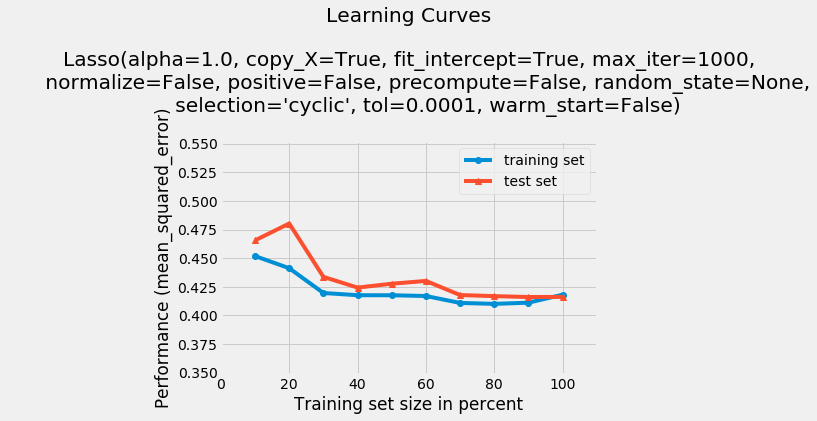

In [193]:
plot_learning_curves(trainx, trainy1, testx, testy1, ls, scoring='mean_squared_error')

## Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(trainx, trainy1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
rmse(trainy, np.exp(ls.predict(trainx)), testy, np.exp(ls.predict(testx)))

RMSE
Train = 106.03338316853915
Test = 97.92984059340694
MAPE
Train = 63.73826192280207
Test = 64.07208407025344


([0.1779705365653759,
  0.18152170169857054,
  0.17624696548128185,
  0.17551396134665395,
  0.17778778329284994,
  0.17818087809804173,
  0.17575093724555418,
  0.1781655298444134,
  0.17987607727494606,
  0.18052865017782102],
 [0.20073253704213814,
  0.19198941922725227,
  0.18507938242184346,
  0.18290191430531383,
  0.18163326330072305,
  0.18165936951890205,
  0.17963510251092774,
  0.17896919703048586,
  0.1791397178659125,
  0.179277719269744])

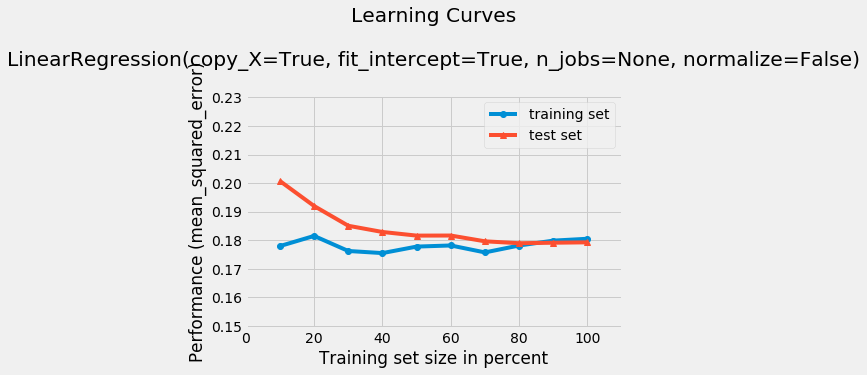

In [196]:
plot_learning_curves(trainx, trainy1, testx, testy1, lr, scoring='mean_squared_error')

## KNN

In [197]:
num_cols = trainx.select_dtypes(['int64', 'float64']).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainx[num_cols])
trainx_scaled[num_cols] = scaler.transform(trainx[num_cols])
testx_scaled[num_cols] = scaler.transform(testx[num_cols])

In [198]:
from sklearn.neighbors import KNeighborsRegressor

In [199]:
parameters = {'n_neighbors':range(1,15),'metric':['minkowski', 'jaccard', 'dice'], 'p':range(1,7)}
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=parameters, cv = 5,n_jobs=-1)
knn_grid.fit(trainx_scaled, trainy1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['minkowski', 'jaccard', 'dice'],
                         'n_neighbors': range(1, 15), 'p': range(1, 7)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [200]:
knn_grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 1}

In [201]:
rmse(trainy, np.exp(knn_grid.best_estimator_.predict(trainx)), testy, np.exp(knn_grid.best_estimator_.predict(testx)))

RMSE
Train = 91.13656436337928
Test = 90.48596813317658
MAPE
Train = 75.86000509593622
Test = 76.33670744230129


([0.20657805865350157,
  0.17263302866063004,
  0.1455171463587448,
  0.13323118382848995,
  0.12639577580917016,
  0.12446359911225084,
  0.11929333170199688,
  0.11920719435965606,
  0.11798925848888499,
  0.11373889109511054],
 [0.32240645859073963,
  0.28544159471188846,
  0.27321109591159537,
  0.25957797859988035,
  0.2523728913526409,
  0.23573072624372163,
  0.22514183408837152,
  0.21953304838636856,
  0.21866864524446133,
  0.21356365354769585])

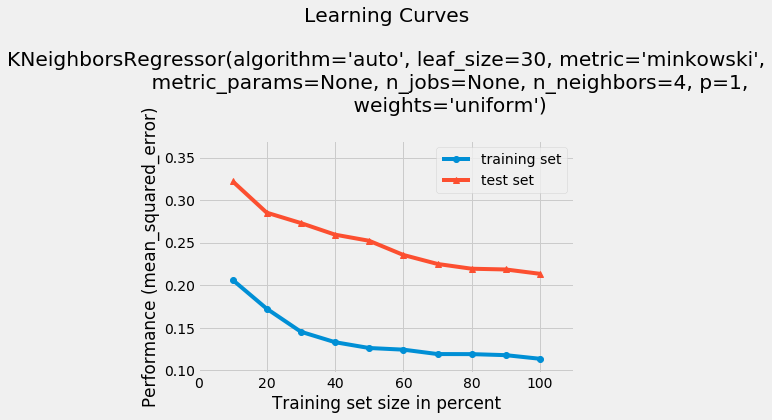

In [202]:
plot_learning_curves(trainx, trainy1, testx, testy1, knn_grid.best_estimator_, scoring='mean_squared_error')

Models built:

1. elastic net
2. decision tree
3. Boosted Decision tree
4. random forest
5. light gbm
4. xgboost
5. Gradient boosting
6. Elastic net
7. Linear Regression
8. KNN 

In [203]:
#Dataframe to compare models
machine_learning = pd.DataFrame({'train':{'decision tree':mse(trainy, np.exp(dtr_grid.best_estimator_.predict(trainx)))**0.5,
                                         'bossting DT':mse(trainy, np.exp(dtr_boost.best_estimator_.predict(trainx)))**0.5,
                                         'random forest':mse(trainy, np.exp(rf.predict(trainx_rf)))**0.5,
                                         'Light GBM':mse(trainy, np.exp(lgbm_grid.best_estimator_.predict(trainx_lgbm)))**0.5,
                                         'XG Boost':mse(trainy, np.exp(xgb.predict(trainx)))**0.5,
                                         'Gradient Boosting':mse(trainy, np.exp(gbr.predict(trainx_gbr)))**0.5,
                                         'elastic_net':mse(trainy, np.exp(els_grid.predict(trainx)))**0.5,
                                         'lasoo':mse(trainy, np.exp(ls.predict(trainx)))**0.5,
                                         'linear_regression': mse(trainy, np.exp(lr.predict(trainx)))**0.5,
                                         'knn': mse(trainy, np.exp(knn_grid.best_estimator_.predict(trainx)))**0.5 
                                         },
                                'test':{ 'decision tree':mse(testy, np.exp(dtr_grid.best_estimator_.predict(testx)))**0.5,
                                         'bossting DT':mse(testy, np.exp(dtr_boost.best_estimator_.predict(testx)))**0.5,
                                         'random forest':mse(testy, np.exp(rf.predict(testx_rf)))**0.5,
                                         'Light GBM':mse(testy, np.exp(lgbm_grid.best_estimator_.predict(testx_lgbm)))**0.5,
                                         'XG Boost':mse(testy, np.exp(xgb.predict(testx)))**0.5,
                                         'Gradient Boosting':mse(testy, np.exp(gbr.predict(testx_gbr)))**0.5,
                                         'elastic_net':mse(testy, np.exp(els_grid.predict(testx)))**0.5,
                                         'lasoo':mse(testy, np.exp(ls.predict(testx)))**0.5,
                                         'linear_regression': mse(testy, np.exp(lr.predict(testx)))**0.5,
                                         'knn': mse(testy, np.exp(knn_grid.best_estimator_.predict(testx)))**0.5 
                                         }})

In [204]:
machine_learning = machine_learning.T

In [205]:
machine_learning.loc['train', 'Naive'] = ((trainy-trainy.median())**2).mean()**0.5
machine_learning.loc['test', 'Naive'] = ((testy-trainy.median())**2).mean()**0.5
machine_learning

,decision tree,bossting DT,random forest,Light GBM,XG Boost,Gradient Boosting,elastic_net,lasoo,linear_regression,knn,Naive
train,43.363233,66.98930,31.049726,40.906972,33.670500,36.643555,80.125699,106.033383,61.171530,48.792800,96.216940
test,52.611353,63.42653,41.715654,42.705063,40.802292,42.786203,76.123669,97.929841,60.681266,60.093803,94.223898


In [206]:
#machine_learning.T.plot(kind = 'bar', figsize = (15,6))

## Final Suggestion

* Encourage hosts to make their property instantly bookable so that it makes life for travellers easy.
* The type of cancellation policy: If it is moderate instead of strict, the probability of a guest choosing that particular host is high.

## SVR

In [207]:
#from sklearn.svm import SVR

In [208]:
#parameters = {'kernel':['rbf', 'poly', 'linear', 'sigmoid'], 'degree':[3,4,5,6,7]}

In [209]:
#svr_grid = GridSearchCV(SVR(), param_grid=parameters, cv =5, n_jobs=-1)
#svr_grid.fit(trainx_scaled, trainy1)

In [210]:
#svr_grid.best_params_

In [211]:
#rmse(trainy1, svr_grid.predict(trainx), testy1,svr_grid.predict(testx))

In [212]:
#rmse(trainy, np.exp(svr_grid.predict(trainx)), testy, np.exp(svr_grid.predict(testx)))

In [213]:
#plot_learning_curves(trainx, trainy1, testx, testy1, svr_grid.best_estimator_, scoring='mean_squared_error')